In [3]:
# select columns starting with a certain string
# 

In [4]:
## Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 20000)

## Import data
path = '/Users/nikhilsawal/OneDrive/ml_case_studies/airbnb/solution/data/'
contacts = pd.read_csv(path + 'contacts.csv')
listings = pd.read_csv(path + 'listings.csv')
users = pd.read_csv(path + 'users.csv')

## EDA
print(contacts.shape)
print(listings.shape)
print(users.shape)

(27887, 14)
(13038, 4)
(31525, 3)


In [5]:
print(contacts.isna().sum())
print(listings.isna().sum())
print(users.isna().sum())

id_guest_anon                               0
id_host_anon                                0
id_listing_anon                             0
ts_interaction_first                        0
ts_reply_at_first                        2032
ts_accepted_at_first                    11472
ts_booking_at                           16300
ds_checkin_first                            0
ds_checkout_first                           0
m_guests                                    1
m_interactions                              0
m_first_message_length_in_characters        0
contact_channel_first                       0
guest_user_stage_first                      0
dtype: int64
id_listing_anon         0
room_type               0
listing_neighborhood    0
total_reviews           0
dtype: int64
id_user_anon             0
country                  1
words_in_user_profile    0
dtype: int64


In [6]:
print(contacts.dtypes)
print(listings.dtypes)
print(users.dtypes)

id_guest_anon                            object
id_host_anon                             object
id_listing_anon                          object
ts_interaction_first                     object
ts_reply_at_first                        object
ts_accepted_at_first                     object
ts_booking_at                            object
ds_checkin_first                         object
ds_checkout_first                        object
m_guests                                float64
m_interactions                            int64
m_first_message_length_in_characters    float64
contact_channel_first                    object
guest_user_stage_first                   object
dtype: object
id_listing_anon          object
room_type                object
listing_neighborhood     object
total_reviews           float64
dtype: object
id_user_anon             object
country                  object
words_in_user_profile     int64
dtype: object


## Contacts

In [7]:
contacts.head()

ts_col = [col for col in contacts if col.startswith('ts_')]
contacts[ts_col] = contacts[ts_col].apply(pd.to_datetime)

ds_col = [col for col in contacts if col.startswith('ds_')]
contacts[ds_col] = contacts[ds_col].apply(pd.to_datetime)

summary_df = {'data_types' : contacts.dtypes,
              'missing_values' : contacts.isna().sum()}

summary_df = pd.DataFrame(summary_df)
summary_df

,data_types,missing_values
id_guest_anon,object,0
id_host_anon,object,0
id_listing_anon,object,0
ts_interaction_first,datetime64[ns],0
ts_reply_at_first,datetime64[ns],2032
ts_accepted_at_first,datetime64[ns],11472
ts_booking_at,datetime64[ns],16300
ds_checkin_first,datetime64[ns],0
ds_checkout_first,datetime64[ns],0
m_guests,float64,1


In [8]:
import numpy as np

# Merge contacts and listings
merged_df = pd.merge(listings, contacts, how = 'left', on = 'id_listing_anon')

# Get listing_ids not in contacts
delta_listings = np.setdiff1d(listings['id_listing_anon'], contacts['id_listing_anon'])

# Get listing with and without checkins
no_checkins_df = merged_df[merged_df['id_listing_anon'].isin(delta_listings)]
checkins_df = merged_df[~merged_df['id_listing_anon'].isin(delta_listings)]


In [9]:
# Count of unique values
print(checkins_df['contact_channel_first'].value_counts())
print(checkins_df['guest_user_stage_first'].value_counts())
print(no_checkins_df.shape)
print(len(listings['id_listing_anon'].unique()))
print(len(contacts['id_listing_anon'].unique()))
len(checkins_df['id_listing_anon'].unique())

contact_me      12828
book_it          8366
instant_book     6693
Name: contact_channel_first, dtype: int64
new            15905
past_booker    11947
-unknown-         35
Name: guest_user_stage_first, dtype: int64
(219, 17)
13038
12819


12819

In [10]:
checkins_df = checkins_df.sort_values(by = 'ds_checkin_first', ascending = True)
checkins_df['month_yr'] = pd.to_datetime(checkins_df['ts_interaction_first']).dt.to_period('M')

In [11]:
month_grp = checkins_df.groupby(['month_yr'])
listings = pd.DataFrame(month_grp['contact_channel_first'].value_counts())
listings.columns = ['count_listings']
listings.reset_index(inplace=True)
print(listings)

   month_yr contact_channel_first  count_listings
0   2016-01            contact_me            4228
1   2016-01               book_it            2371
2   2016-01          instant_book            1019
3   2016-02            contact_me            1798
4   2016-02               book_it            1291
5   2016-02          instant_book             982
6   2016-03            contact_me            1640
7   2016-03               book_it            1200
8   2016-03          instant_book             977
9   2016-04            contact_me            1603
10  2016-04               book_it            1127
11  2016-04          instant_book             986
12  2016-05            contact_me            1761
13  2016-05          instant_book            1334
14  2016-05               book_it            1209
15  2016-06            contact_me            1798
16  2016-06          instant_book            1395
17  2016-06               book_it            1168


In [12]:
checkins_df['month_yr'].value_counts()

2016-01    7618
2016-06    4361
2016-05    4304
2016-02    4071
2016-03    3817
2016-04    3716
Freq: M, Name: month_yr, dtype: int64

In [13]:
checkins_df.head()
# max(checkins_df['total_reviews']), min(checkins_df['total_reviews'])

,id_listing_anon,room_type,listing_neighborhood,total_reviews,id_guest_anon,id_host_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first,month_yr
15783,863def9e-f64d-4de3-8eca-beef4d5142c6,Private room,-unknown-,0.0,2b7e44cb-e9b4-40db-9f40-37c5e4fcb2b0,f7aaf4e2-fa75-44d3-aaf7-1fd56bfc7be0,2016-01-01 14:07:54,2016-01-01 14:14:55,NaT,NaT,2016-01-01,2016-01-05,1.0,10.0,215.0,contact_me,new,2016-01
11045,00c5ad42-75fb-4ca6-90a3-679809368a45,Private room,-unknown-,1.0,4ac626d8-2e2e-4f26-bc3c-aef3c88e67ba,f541ac0e-2619-4bc6-86bd-a8299e12bb35,2016-01-01 07:51:38,2016-01-01 16:15:20,NaT,NaT,2016-01-01,2016-01-02,1.0,3.0,69.0,book_it,new,2016-01
10127,c06110e5-256e-4e5d-bb97-a56beeea3de7,Private room,Copacabana,26.0,3350a226-eeca-429b-be2a-79d251998de7,c712aaf7-6666-4f6e-8580-9a2431f314e0,2016-01-01 13:57:45,NaT,NaT,NaT,2016-01-01,2016-01-02,1.0,1.0,210.0,contact_me,past_booker,2016-01
418,0ed4cf7e-5fb0-4248-b2b3-fe277c22ea3a,Entire home/apt,Copacabana,22.0,05f35d89-2121-4fe2-9682-44c1ff2b6a01,e7c5fd22-84f1-44a7-a7f1-f32c0462bc27,2016-01-01 12:13:15,2016-01-01 14:40:38,NaT,NaT,2016-01-01,2016-01-03,1.0,4.0,158.0,contact_me,new,2016-01
11046,00c5ad42-75fb-4ca6-90a3-679809368a45,Private room,-unknown-,1.0,a6f9e127-4e55-42ee-9e06-0a5803414113,f541ac0e-2619-4bc6-86bd-a8299e12bb35,2016-01-01 11:24:25,2016-01-01 16:13:54,NaT,NaT,2016-01-01,2016-01-02,1.0,2.0,133.0,book_it,new,2016-01


## Time between different stages of bookings

In [14]:
from datetime import datetime

# First interaction to reply
duration = checkins_df['ts_reply_at_first'] - checkins_df['ts_interaction_first']
duration_in_s = [i for i in duration.apply(lambda x: x.total_seconds())]

interaction_to_reply = [divmod(i, 3600)[0] for i in duration_in_s]

# Reply to acceptance
duration =  checkins_df['ts_accepted_at_first'] - checkins_df['ts_reply_at_first']
duration_in_s = [i for i in duration.apply(lambda x: x.total_seconds())]

reply_to_acceptance = [divmod(i, 3600)[0] for i in duration_in_s]

# Acceptance to booking
duration =  checkins_df['ts_booking_at'] - checkins_df['ts_accepted_at_first']
duration_in_s = [i for i in duration.apply(lambda x: x.total_seconds())]

acceptance_to_booking = [divmod(i, 3600)[0] for i in duration_in_s]

# First interaction to booking
duration =  checkins_df['ts_booking_at'] - checkins_df['ts_interaction_first']
duration_in_s = [i for i in duration.apply(lambda x: x.total_seconds())]

interaction_to_booking = [divmod(i, 3600)[0] for i in duration_in_s]


In [15]:
# Add the time variables to checkins_df

checkins_df['interaction_to_booking'] = interaction_to_booking
checkins_df['interaction_to_reply'] = interaction_to_reply
checkins_df['acceptance_to_booking'] = acceptance_to_booking
checkins_df['reply_to_acceptance'] = reply_to_acceptance

In [16]:
# Count of missing values
checkins_df['is_interaction_first'] = checkins_df['ts_interaction_first'].isna()
checkins_df['is_reply_at_first'] = checkins_df['ts_reply_at_first'].isna()
checkins_df['is_accepted_at_first'] = checkins_df['ts_accepted_at_first'].isna()
checkins_df['is_booking_at'] = checkins_df['ts_booking_at'].isna()


def get_final_df(input_df):
    
    month_grp = input_df.groupby(['month_yr'])
    
    # Make dataframes
    df_1 = pd.DataFrame(month_grp['is_interaction_first'].value_counts())
    df_2 = pd.DataFrame(month_grp['is_reply_at_first'].value_counts())
    df_3 = pd.DataFrame(month_grp['is_accepted_at_first'].value_counts())
    df_4 = pd.DataFrame(month_grp['is_booking_at'].value_counts())

    # Rename count columns
    df_1.columns = ['count_interaction_first']
    df_2.columns = ['count_reply']
    df_3.columns = ['count_accepted']
    df_4.columns = ['count_booking']

    # Reset indexes
    df_1.reset_index(inplace=True)
    df_2.reset_index(inplace=True)
    df_3.reset_index(inplace=True)
    df_4.reset_index(inplace=True)

    merged_counts_df = pd.merge(df_4, df_3, how = 'left', 
                                left_on = ['month_yr', 'is_booking_at'],
                                right_on = ['month_yr', 'is_accepted_at_first'])

    merged_counts_df_1 = pd.merge(df_2, df_1, how = 'left', 
                                  left_on = ['month_yr', 'is_reply_at_first'],
                                  right_on = ['month_yr', 'is_interaction_first'])

    merged_counts_df_1['is_interaction_first'].fillna(value=True, inplace=True)
    merged_counts_df_1['count_interaction_first'].fillna(0, inplace=True)

    final_merged_counts_df = pd.merge(merged_counts_df, merged_counts_df_1, 
                                      how = 'left',
                                      left_on = ['month_yr', 'is_booking_at'],
                                      right_on = ['month_yr', 'is_reply_at_first'])

    final_merged_counts_df = final_merged_counts_df.drop(['is_accepted_at_first', 
                                                          'is_reply_at_first',
                                                          'is_interaction_first'], 
                                                          axis = 1) 

    bookings_df = final_merged_counts_df[final_merged_counts_df['is_booking_at']==False]
    churn_df = final_merged_counts_df[final_merged_counts_df['is_booking_at']==True]

    bookings_df.columns = ['month_yr', 'is_booking_at', 'booking(#)', 
                        'interaction_accepted(#)', 'interaction_reply(#)', 
                        'interaction_started(#)']

    churn_df.columns = ['month_yr', 'is_booking_at', 'churned_at_booking(#)', 
                        'interaction_rejected(#)', 'no_reply(#)', 
                        'interaction_started(#)']

    bookings_df = bookings_df.drop(['is_booking_at'], axis=1)
    churn_df = churn_df.drop(['is_booking_at', 'interaction_started(#)'], axis=1)

    bookings_df['interaction_started(#)'] = [i for i in bookings_df['interaction_started(#)'].apply(lambda x: int(x))]
    final_df = pd.merge(bookings_df, churn_df.iloc[:,:2], how = 'left', on = 'month_yr')
    
    final_df['reply_rate(%)'] = round(final_df['interaction_reply(#)'] / final_df['interaction_started(#)'] * 100, 2)
    final_df['booking_rate(%)'] = round(final_df['booking(#)'] / final_df['interaction_started(#)'] * 100, 2)
    final_df['abandonment_rate(%)'] = round(final_df['churned_at_booking(#)'] / final_df['interaction_started(#)'] * 100, 2)
    
    return final_df

## Overall

In [17]:
final_df = get_final_df(checkins_df)

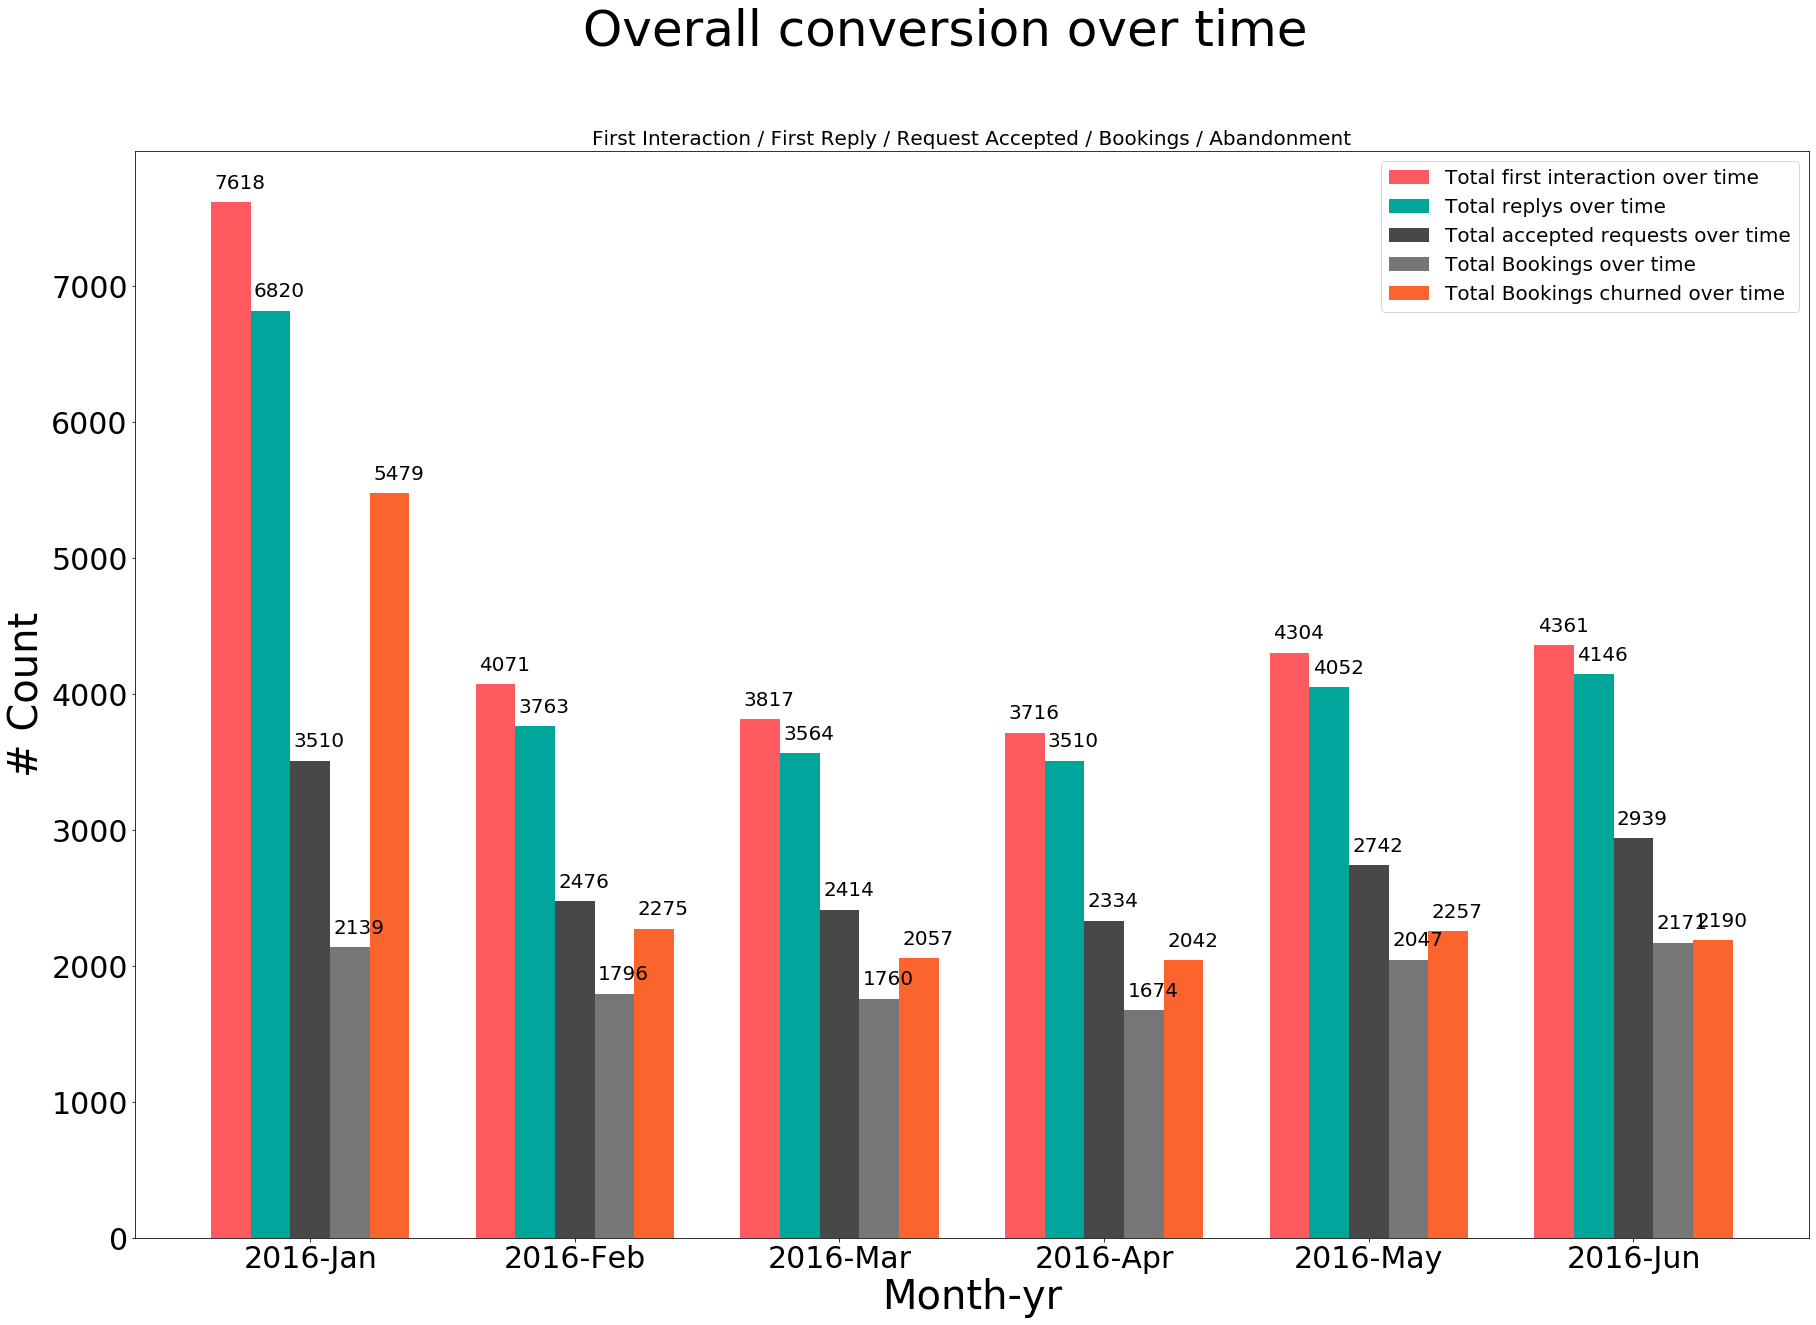

In [55]:
x = [i for i in final_df['month_yr'].apply(lambda x: x.strftime('%Y-%b'))]
x_indexes = np.arange(len(x))
width = 0.15
fig, ax = plt.subplots()
fig.set_figheight(20)
fig.set_figwidth(30)

# plt.style.use("fivethirtyeight")
rects1 = ax.bar(x_indexes, 
         final_df['interaction_started(#)'], 
         width=width,
         color="#FF5A5F", 
         label="Total first interaction over time")
rects2 = ax.bar(x_indexes + 0.15, 
         final_df['interaction_reply(#)'],
         width=width,
         color="#00A699", 
         label="Total replys over time")
rects3 = ax.bar(x_indexes + 0.3, 
         final_df['interaction_accepted(#)'],
         width=width,
         color="#484848", 
         label="Total accepted requests over time")
rects4 = ax.bar(x_indexes + 0.45, 
         final_df['booking(#)'],
         width=width,
         color="#767676", 
         label="Total Bookings over time")
rects5 = ax.bar(x_indexes + 0.6, 
         final_df['churned_at_booking(#)'],
         width=width,
         color="#FC642D", 
         label="Total Bookings churned over time")
plt.legend(("Total first interaction over time", "Total replys over time", 
            "Total accepted requests over time", "Total Bookings over time",
            "Total Bookings churned over time"), fontsize=20)
plt.xticks(ticks=x_indexes + 2.00*width, labels=x, fontsize=30)
plt.yticks(fontsize=30)
plt.suptitle("Overall conversion over time", fontsize=50, ha='center')
plt.title("First Interaction / First Reply / Request Accepted / Bookings / Abandonment", fontsize=20)
plt.xlabel("Month-yr", fontsize=40)
plt.ylabel("# Count", fontsize=40)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(9, 10),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=20)


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

plt.show()

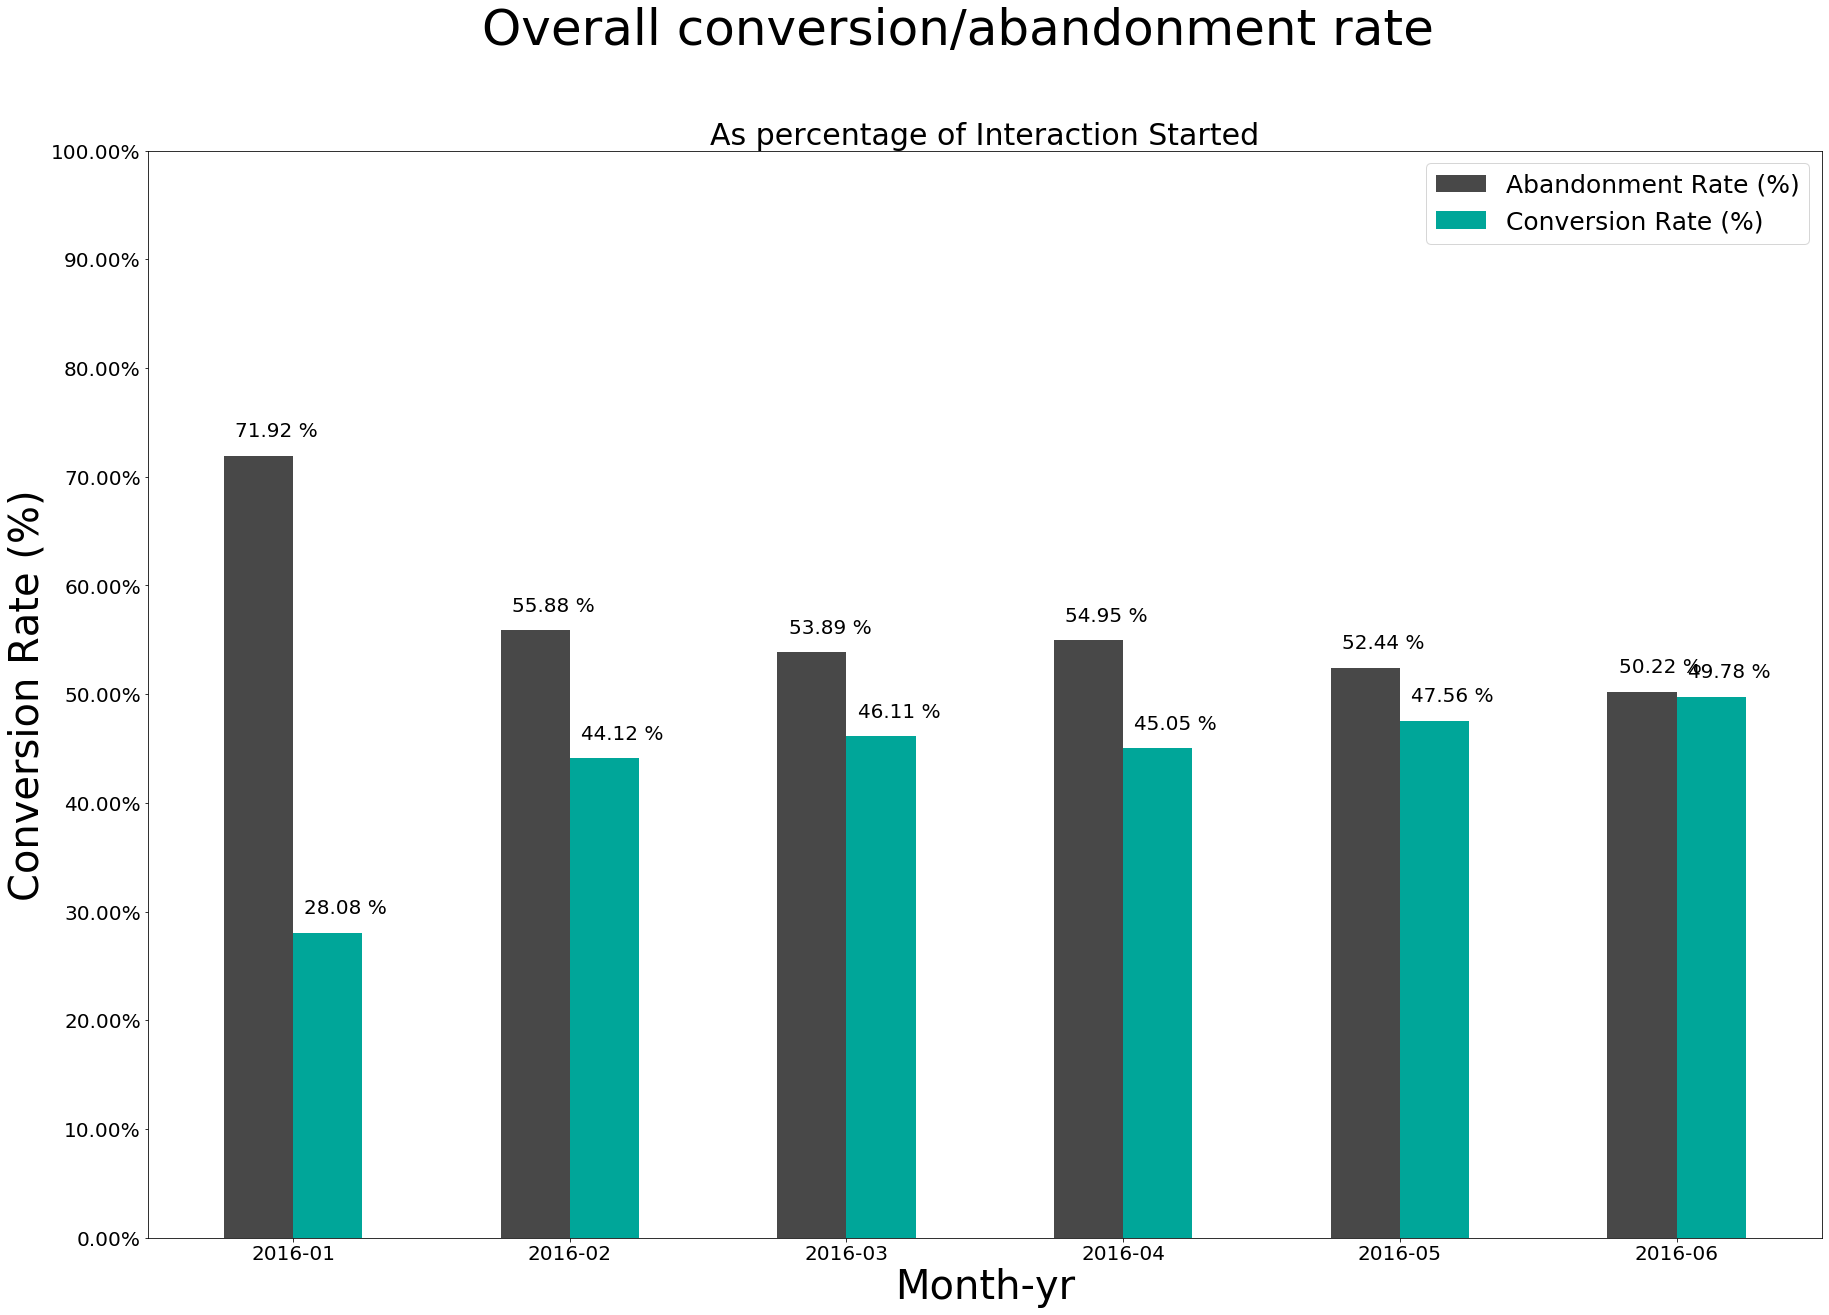

In [56]:
from matplotlib.ticker import FormatStrFormatter

x = [i for i in final_df['month_yr'].apply(lambda x: x.strftime('%Y-%m'))]
x_indexes = np.arange(len(x))
y_indexes = np.arange(0, 110, 10)
width = 0.25

fig, ax = plt.subplots()
fig.set_figheight(20)
fig.set_figwidth(30)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f%%'))
rects1 = ax.bar(x_indexes + 0.25, 
         final_df['abandonment_rate(%)'],
         width=width,
         color="#484848", 
         label="Abandonment Rate (%)")
rects2 = ax.bar(x_indexes + 0.5, 
         final_df['booking_rate(%)'],
         width=width,
         color="#00A699", 
         label="Booking Rate (%)")
plt.legend(("Abandonment Rate (%)", "Conversion Rate (%)"), fontsize=25)
plt.xticks(ticks=x_indexes + 1.5*width, labels=x, fontsize=20)
plt.yticks(ticks=y_indexes, fontsize=20)
plt.title("As percentage of Interaction Started", fontsize=30, ha='center')
plt.suptitle("Overall conversion/abandonment rate", fontsize=50, ha='center')
plt.xlabel("Month-yr", fontsize=40)
plt.ylabel("Conversion Rate (%)", fontsize=40)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{} %'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(18, 15),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=20)

autolabel(rects1)
autolabel(rects2)

plt.show()

## By Room type

In [20]:
checkins_df['room_type'].unique()

checkins_df_private_room = checkins_df[checkins_df['room_type'] == 'Private room']
checkins_df_private_room = get_final_df(checkins_df_private_room)

checkins_df_entire_apt = checkins_df[checkins_df['room_type'] == 'Entire home/apt']
checkins_df_entire_apt = get_final_df(checkins_df_entire_apt)

checkins_df_shared_room = checkins_df[checkins_df['room_type'] == 'Shared room']
checkins_df_shared_room = get_final_df(checkins_df_shared_room)

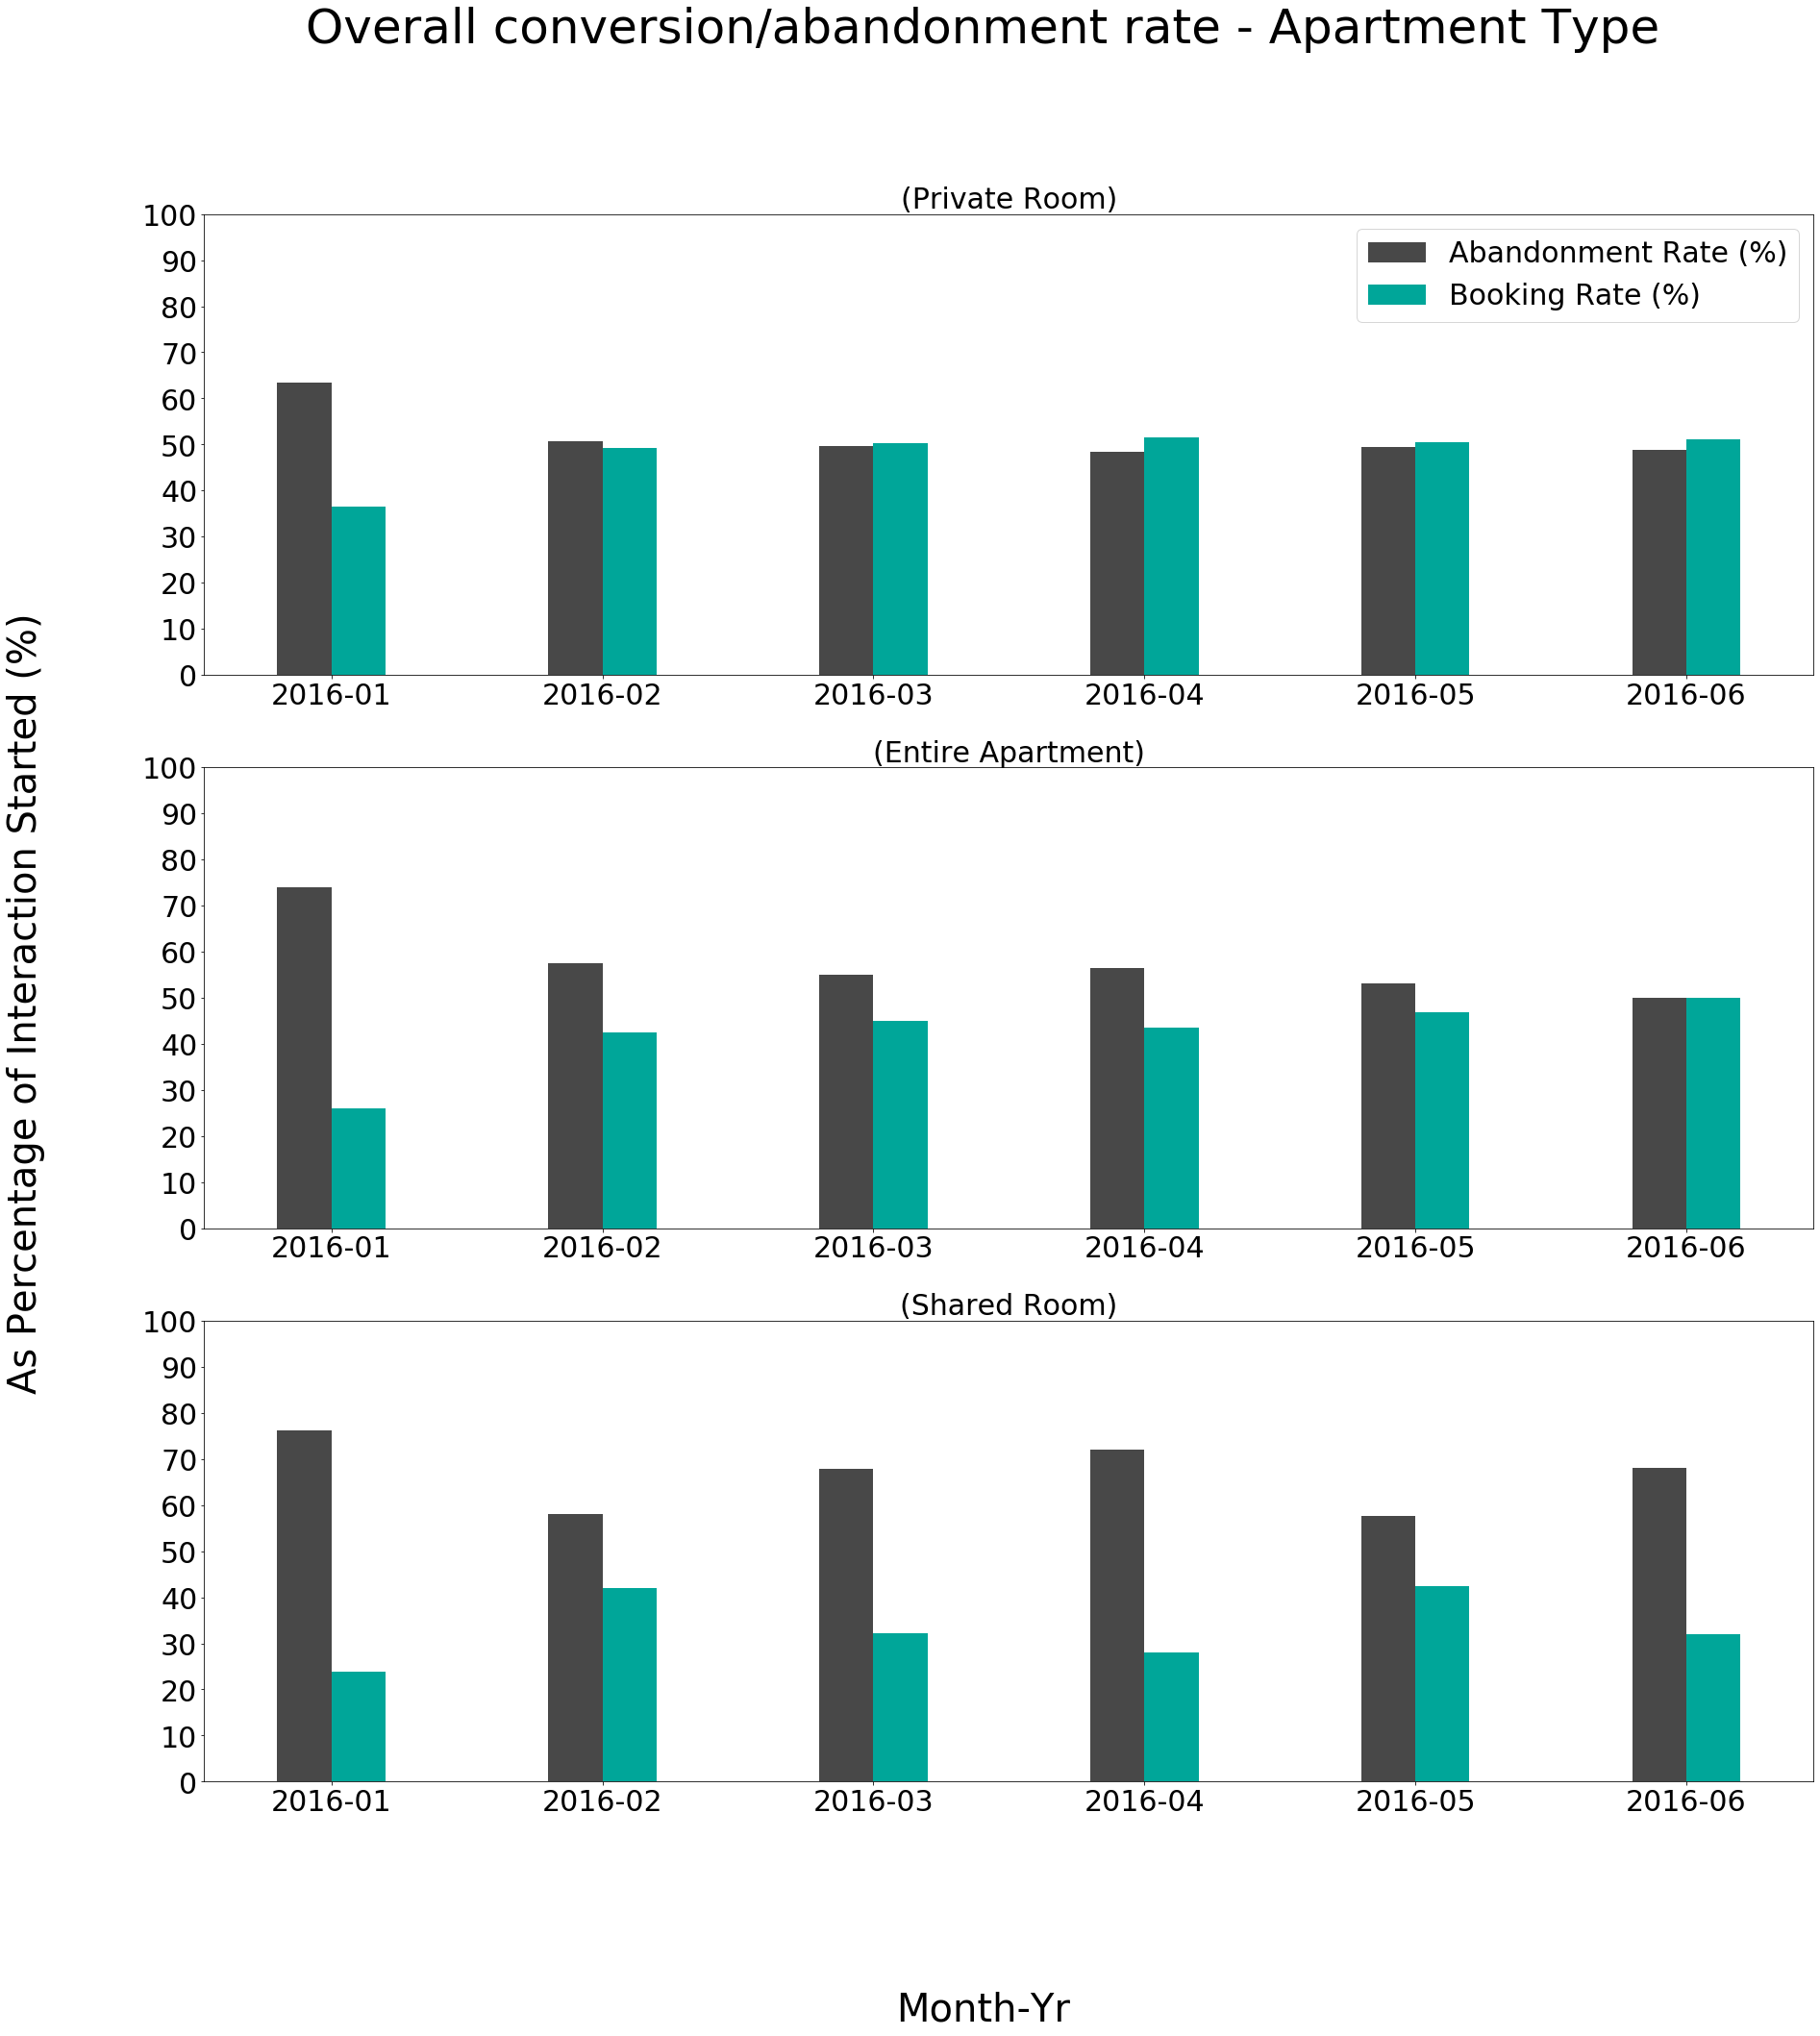

In [46]:
from matplotlib.ticker import PercentFormatter

x = [i for i in checkins_df_private_room['month_yr'].apply(lambda x: x.strftime('%Y-%m'))]
x_indexes = np.arange(len(x))
y_indexes = np.arange(0, 110, 10)
width = 0.20

fig, ax = plt.subplots(3,1)
fig.set_figheight(30)
fig.set_figwidth(30)
top_ax, middle_ax, bottom_ax = ax

################
# Private Room #
################

top_ax.bar(x_indexes + 0.00, 
         checkins_df_private_room['abandonment_rate(%)'],
         width=width,
         color="#484848", 
         label="Abandonment Rate (%)")
top_ax.bar(x_indexes + 0.20, 
         checkins_df_private_room['booking_rate(%)'],
         width=width,
         color="#00A699", 
         label="Booking Rate (%)")

# plt.xticks(ticks=x_indexes + 0.5*width, labels=x, fontsize=20)
top_ax.legend(fontsize=30, loc='upper right')
top_ax.set_title('(Private Room)', fontsize=30)
top_ax.set_xticks(ticks=x_indexes + 0.5*width)
top_ax.set_xticklabels(labels=x, fontsize=30)

top_ax.set_yticks(ticks=y_indexes)
top_ax.set_yticklabels(y_indexes, fontsize = 30)

####################
# Entire Apartment #
####################

middle_ax.bar(x_indexes + 0.00, 
         checkins_df_entire_apt['abandonment_rate(%)'],
         width=width,
         color="#484848", 
         label="Abandonment Rate (%)")
middle_ax.bar(x_indexes + 0.20, 
         checkins_df_entire_apt['booking_rate(%)'],
         width=width,
         color="#00A699", 
         label="Booking Rate (%)")

middle_ax.set_xticks(ticks=x_indexes + 0.5*width)
middle_ax.set_xticklabels(labels=x, fontsize=30)
middle_ax.set_yticks(ticks=y_indexes)
middle_ax.set_yticklabels(y_indexes, fontsize = 30)
middle_ax.set_title('(Entire Apartment)', fontsize=30)

###############
# Shared Room #
###############

bottom_ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f%%'))
bottom_ax.bar(x_indexes + 0.00, 
         checkins_df_shared_room['abandonment_rate(%)'],
         width=width,
         color="#484848", 
         label="Abandonment Rate (%)")
bottom_ax.bar(x_indexes + 0.20, 
         checkins_df_shared_room['booking_rate(%)'],
         width=width,
         color="#00A699", 
         label="Booking Rate (%)")

bottom_ax.set_xticks(ticks=x_indexes + 0.5*width)
bottom_ax.set_xticklabels(labels=x, fontsize=30)
bottom_ax.set_yticks(ticks=y_indexes)
bottom_ax.set_yticklabels(y_indexes, fontsize=30)
bottom_ax.set_title('(Shared Room)', fontsize=30)

fig.text(0.5, 0.01, 'Month-Yr', ha='center', fontsize=40)
fig.text(0.03, 0.5, 'As Percentage of Interaction Started (%)', 
         va='center', rotation='vertical', fontsize=40)

plt.suptitle("Overall conversion/abandonment rate - Apartment Type", fontsize=50, ha='center')

plt.show()

# 1. Shared rooms are more likely to be abandoned over time. Typically shared
# rooms are not favourites with families. So based on this analysis we might 
# want to look into our targeting strategies for shared rooms.

# 2. Also, the abandonment in the month of January is consistantly high. So
# we might want to look into that.

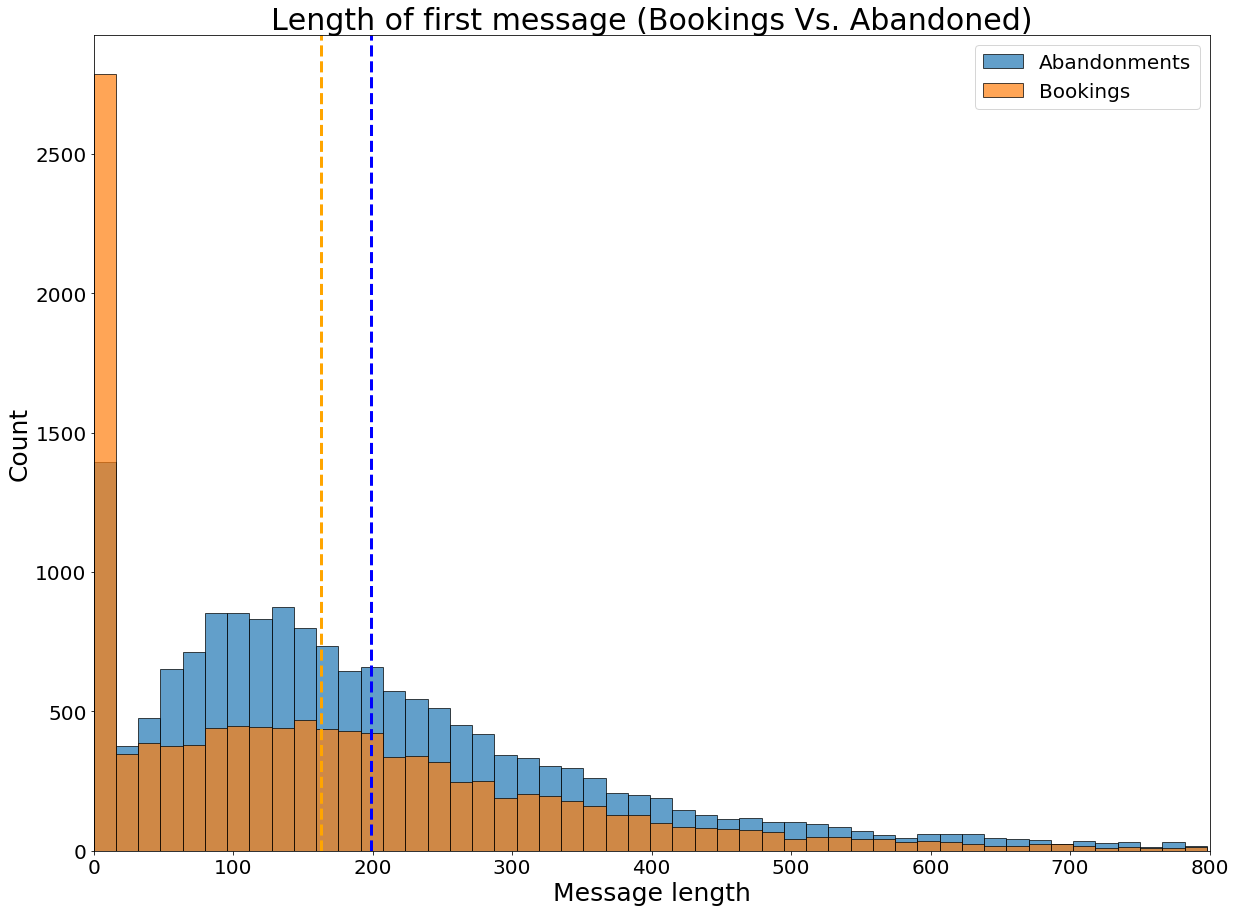

In [163]:
from statistics import mean

bookings_df = checkins_df[checkins_df['is_booking_at']==False]
abandonment_df = checkins_df[checkins_df['is_booking_at']==True]

bookings_df = bookings_df[bookings_df['m_first_message_length_in_characters']<800]
abandonment_df = abandonment_df[abandonment_df['m_first_message_length_in_characters']<800]

plt.hist(abandonment_df['m_first_message_length_in_characters'], edgecolor='black', bins=50, alpha=0.7, label='Abandonments')
plt.hist(bookings_df['m_first_message_length_in_characters'], edgecolor='black', bins=50, alpha=0.7, label='Bookings')
plt.axvline(abandonment_df['m_first_message_length_in_characters'].mean(), color='blue', linestyle='dashed', linewidth=3)
plt.axvline(bookings_df['m_first_message_length_in_characters'].mean(), color='orange', linestyle='dashed', linewidth=3)
plt.xlim(0, 800)
plt.xlabel("Message length", size=25)
plt.ylabel("Count", size=25)
plt.xticks(size=20)
plt.yticks(size=20)
plt.title("Length of first message (Bookings Vs. Abandoned)", size=30)
plt.rcParams["figure.figsize"] = (20,15)
plt.legend(loc='upper right', fontsize=20)



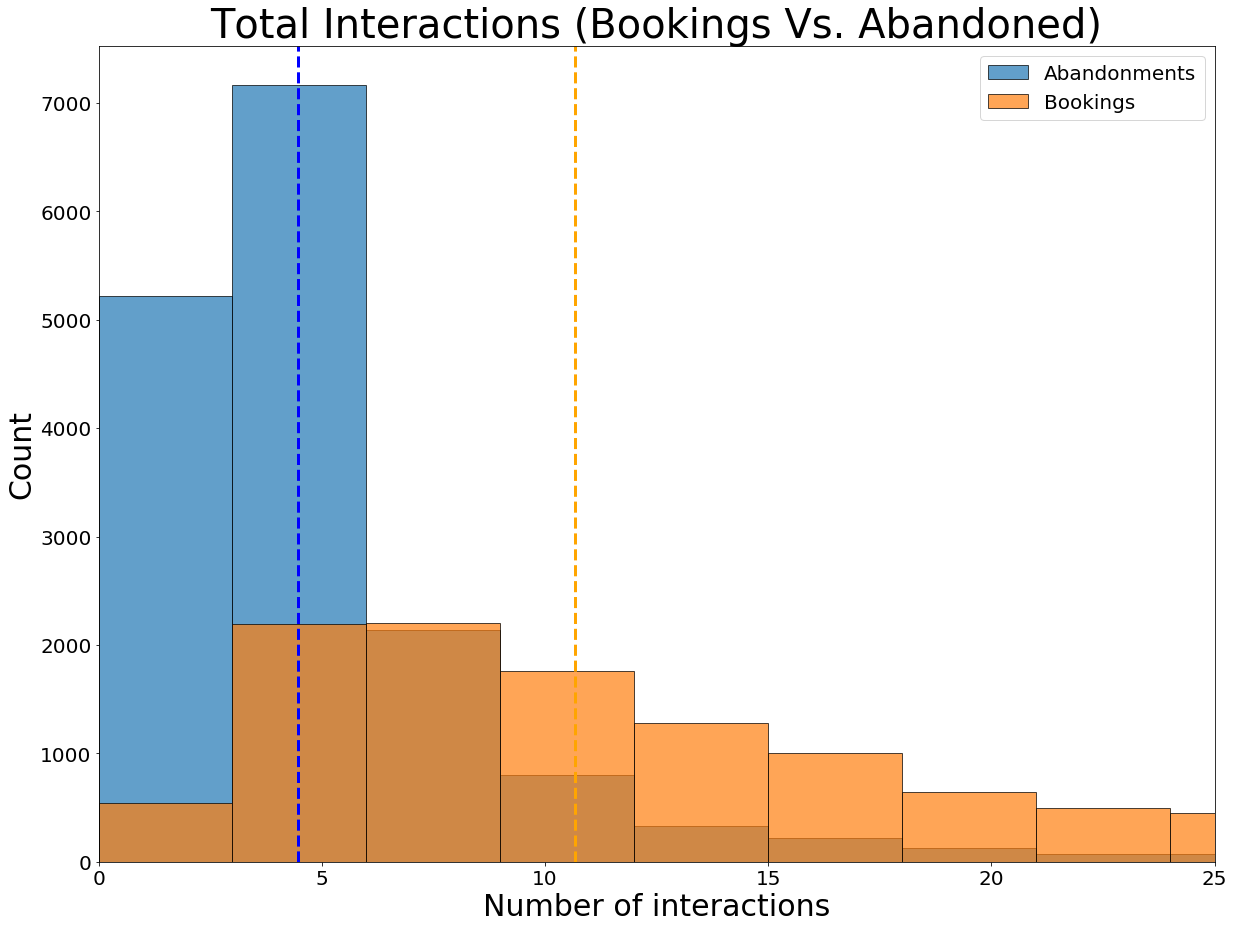

In [166]:
bookings_df = checkins_df[checkins_df['is_booking_at']==False]
abandonment_df = checkins_df[checkins_df['is_booking_at']==True]

bookings_df = bookings_df[bookings_df['m_interactions']<30]
abandonment_df = abandonment_df[abandonment_df['m_interactions']<30]

bins = [0, 3, 6, 9, 12, 15, 18, 21, 24, 27]

plt.hist(abandonment_df['m_interactions'], edgecolor='black', bins=bins, alpha=0.7, label='Abandonments')
plt.hist(bookings_df['m_interactions'], edgecolor='black', bins=bins, alpha=0.7, label='Bookings')
plt.axvline(abandonment_df['m_interactions'].mean(), color='blue', linestyle='dashed', linewidth=3)
plt.axvline(bookings_df['m_interactions'].mean(), color='orange', linestyle='dashed', linewidth=3)
plt.xlim(0, 25)
plt.xlabel("Number of interactions", size=30)
plt.ylabel("Count", size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.title("Total Interactions (Bookings Vs. Abandoned)", size=40)
plt.rcParams["figure.figsize"] = (20,15)
plt.legend(loc='upper right', fontsize=20)



In [96]:
checkins_df.head()

,id_listing_anon,room_type,listing_neighborhood,total_reviews,id_guest_anon,id_host_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first,month_yr,interaction_to_booking,interaction_to_reply,acceptance_to_booking,reply_to_acceptance,is_interaction_first,is_reply_at_first,is_accepted_at_first,is_booking_at
15783,863def9e-f64d-4de3-8eca-beef4d5142c6,Private room,-unknown-,0.0,2b7e44cb-e9b4-40db-9f40-37c5e4fcb2b0,f7aaf4e2-fa75-44d3-aaf7-1fd56bfc7be0,2016-01-01 14:07:54,2016-01-01 14:14:55,NaT,NaT,2016-01-01,2016-01-05,1.0,10.0,215.0,contact_me,new,2016-01,NaN,0.0,NaN,NaN,False,False,True,True
11045,00c5ad42-75fb-4ca6-90a3-679809368a45,Private room,-unknown-,1.0,4ac626d8-2e2e-4f26-bc3c-aef3c88e67ba,f541ac0e-2619-4bc6-86bd-a8299e12bb35,2016-01-01 07:51:38,2016-01-01 16:15:20,NaT,NaT,2016-01-01,2016-01-02,1.0,3.0,69.0,book_it,new,2016-01,NaN,8.0,NaN,NaN,False,False,True,True
10127,c06110e5-256e-4e5d-bb97-a56beeea3de7,Private room,Copacabana,26.0,3350a226-eeca-429b-be2a-79d251998de7,c712aaf7-6666-4f6e-8580-9a2431f314e0,2016-01-01 13:57:45,NaT,NaT,NaT,2016-01-01,2016-01-02,1.0,1.0,210.0,contact_me,past_booker,2016-01,NaN,NaN,NaN,NaN,False,True,True,True
418,0ed4cf7e-5fb0-4248-b2b3-fe277c22ea3a,Entire home/apt,Copacabana,22.0,05f35d89-2121-4fe2-9682-44c1ff2b6a01,e7c5fd22-84f1-44a7-a7f1-f32c0462bc27,2016-01-01 12:13:15,2016-01-01 14:40:38,NaT,NaT,2016-01-01,2016-01-03,1.0,4.0,158.0,contact_me,new,2016-01,NaN,2.0,NaN,NaN,False,False,True,True
11046,00c5ad42-75fb-4ca6-90a3-679809368a45,Private room,-unknown-,1.0,a6f9e127-4e55-42ee-9e06-0a5803414113,f541ac0e-2619-4bc6-86bd-a8299e12bb35,2016-01-01 11:24:25,2016-01-01 16:13:54,NaT,NaT,2016-01-01,2016-01-02,1.0,2.0,133.0,book_it,new,2016-01,NaN,4.0,NaN,NaN,False,False,True,True


## Contact Channel

In [35]:
checkins_df['contact_channel_first'].unique()

checkins_df_contact_me = checkins_df[checkins_df['contact_channel_first'] == 'contact_me']
checkins_df_contact_me = get_final_df(checkins_df_contact_me)

checkins_df_book_it = checkins_df[checkins_df['contact_channel_first'] == 'book_it']
checkins_df_book_it = get_final_df(checkins_df_book_it)

checkins_df_instant_book = checkins_df[checkins_df['contact_channel_first'] == 'instant_book']
checkins_df_instant_book = get_final_df(checkins_df_instant_book)

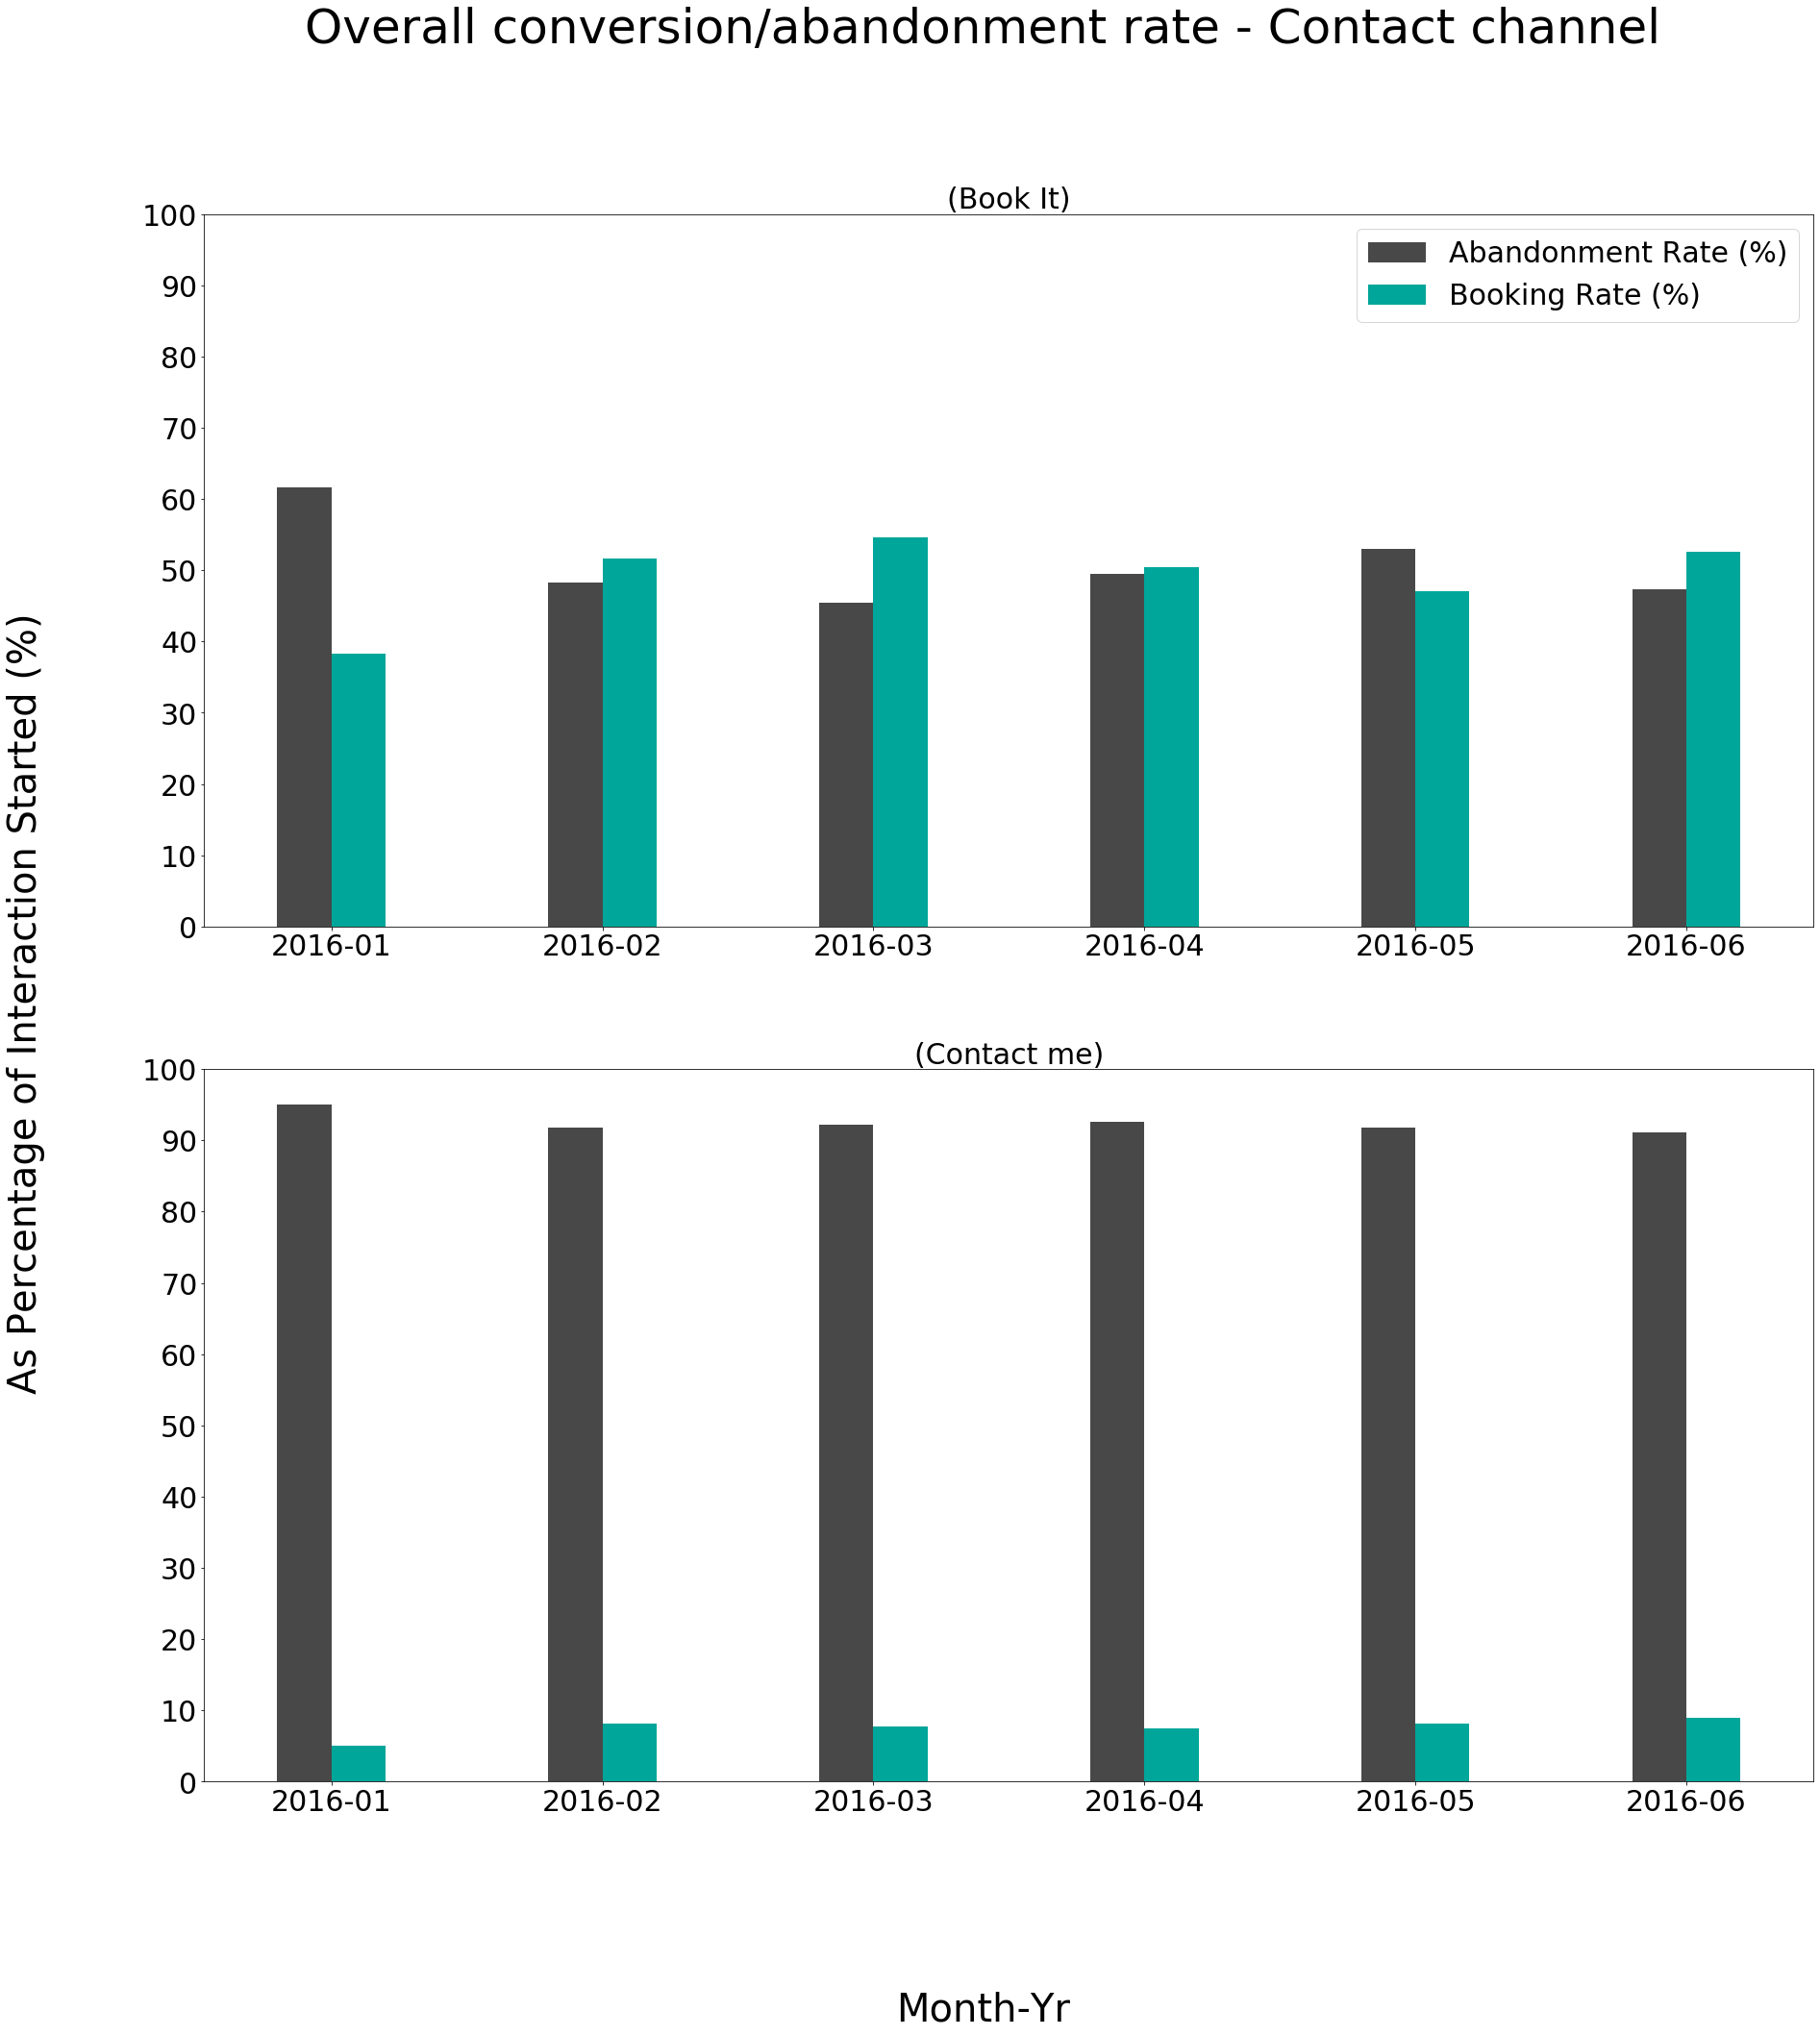

In [49]:
x = [i for i in checkins_df_book_it['month_yr'].apply(lambda x: x.strftime('%Y-%m'))]
x_indexes = np.arange(len(x))
y_indexes = np.arange(0, 110, 10)
width = 0.20

fig, ax = plt.subplots(2,1)
fig.set_figheight(30)
fig.set_figwidth(30)
top_ax, bottom_ax = ax

###########
# Book It #
###########

top_ax.bar(x_indexes + 0.00, 
         checkins_df_book_it['abandonment_rate(%)'],
         width=width,
         color="#484848", 
         label="Abandonment Rate (%)")
top_ax.bar(x_indexes + 0.20, 
         checkins_df_book_it['booking_rate(%)'],
         width=width,
         color="#00A699", 
         label="Booking Rate (%)")

# plt.xticks(ticks=x_indexes + 0.5*width, labels=x, fontsize=20)
top_ax.legend(fontsize=30, loc='upper right')
top_ax.set_title('(Book It)', fontsize=30)
top_ax.set_xticks(ticks=x_indexes + 0.5*width)
top_ax.set_xticklabels(labels=x, fontsize=30)

top_ax.set_yticks(ticks=y_indexes)
top_ax.set_yticklabels(y_indexes, fontsize = 30)

##############
# Contact Me #
##############

bottom_ax.bar(x_indexes + 0.00, 
         checkins_df_contact_me['abandonment_rate(%)'],
         width=width,
         color="#484848", 
         label="Abandonment Rate (%)")
bottom_ax.bar(x_indexes + 0.20, 
         checkins_df_contact_me['booking_rate(%)'],
         width=width,
         color="#00A699", 
         label="Booking Rate (%)")

bottom_ax.set_xticks(ticks=x_indexes + 0.5*width)
bottom_ax.set_xticklabels(labels=x, fontsize=30)
bottom_ax.set_yticks(ticks=y_indexes)
bottom_ax.set_yticklabels(y_indexes, fontsize = 30)
bottom_ax.set_title('(Contact me)', fontsize=30)

fig.text(0.5, 0.01, 'Month-Yr', ha='center', fontsize=40)
fig.text(0.03, 0.5, 'As Percentage of Interaction Started (%)', 
         va='center', rotation='vertical', fontsize=40)

plt.suptitle("Overall conversion/abandonment rate - Contact channel", fontsize=50, ha='center')

plt.show()


## New vs Returning

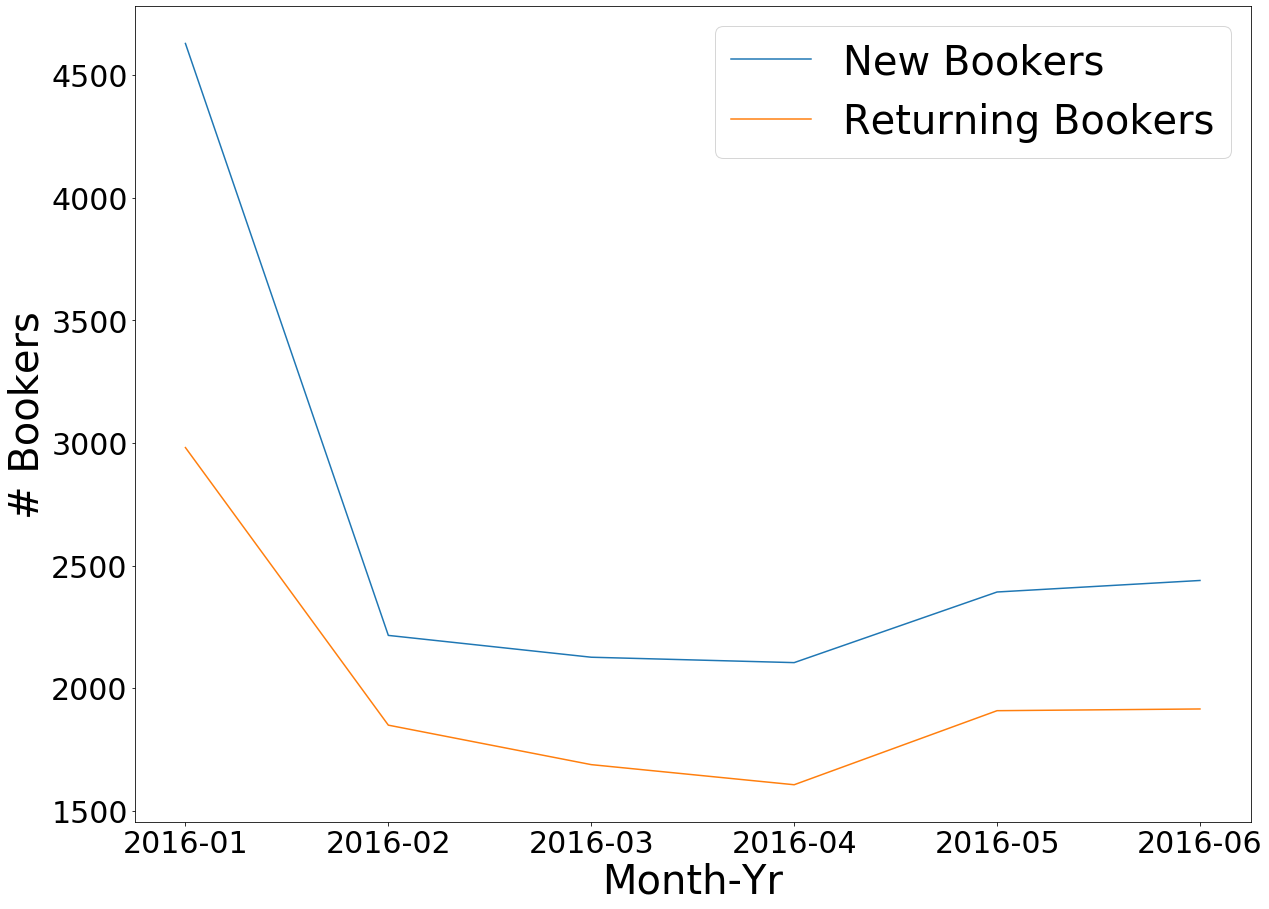

In [73]:
month_grp = checkins_df.groupby(['month_yr'])
new_returning = pd.DataFrame(month_grp['guest_user_stage_first'].value_counts())
new_returning.columns = ['count_listings']
new_returning.reset_index(inplace=True)
new_returning = new_returning.pivot_table(index='month_yr', 
                          columns='guest_user_stage_first',
                          values='count_listings')
new_returning.reset_index(inplace=True)
new_returning.reset_index(inplace=True)
new_returning.drop(columns='index', axis=1, inplace=True)
new_returning

x = [i for i in new_returning['month_yr'].apply(lambda x: x.strftime('%Y-%m'))]

plt.plot(x, new_returning['new'], label='New Bookers')
plt.plot(x, new_returning['past_booker'], label='Returning Bookers')
plt.xlabel('Month-Yr', fontsize=40)
plt.ylabel('# Bookers', fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize=40)
plt.rcParams["figure.figsize"] = (20,15)
plt.show()

In [38]:
checkins_df['guest_user_stage_first'].unique()

checkins_df_new_booker = checkins_df[checkins_df['guest_user_stage_first'] == 'new']
checkins_df_new_booker = get_final_df(checkins_df_new_booker)

checkins_df_past_booker = checkins_df[checkins_df['guest_user_stage_first'] == 'past_booker']
checkins_df_past_booker = get_final_df(checkins_df_past_booker)

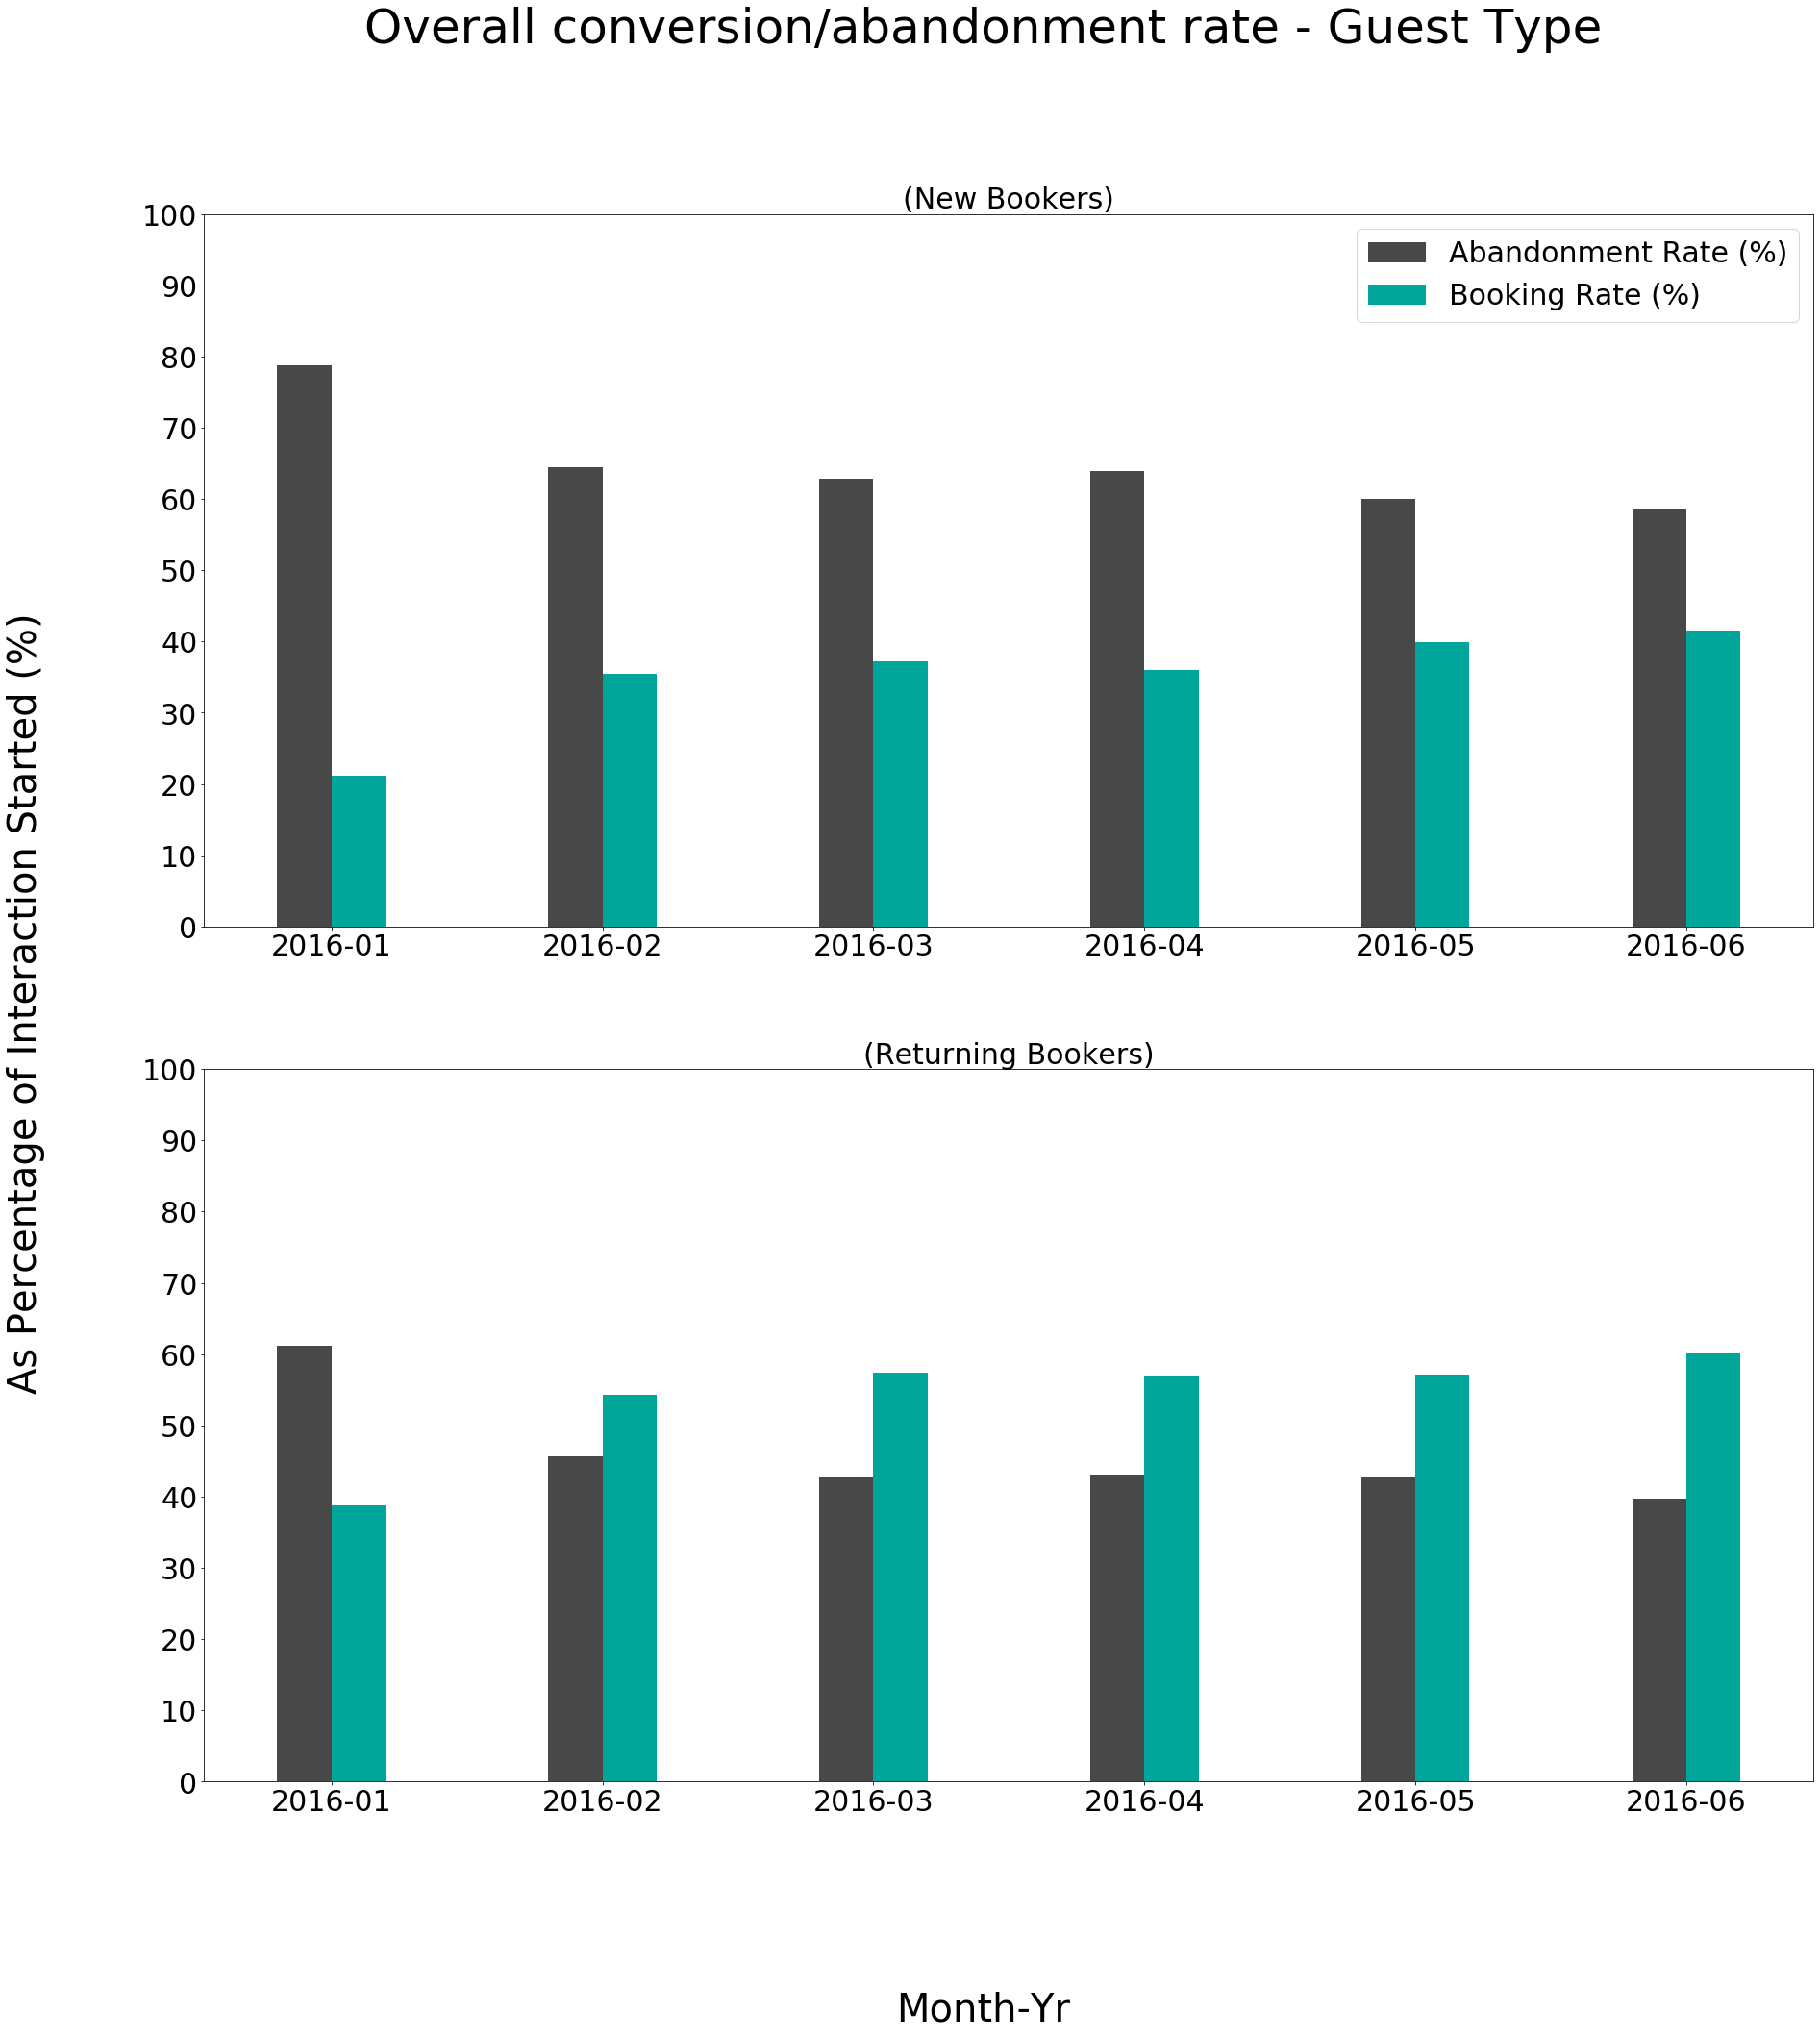

In [51]:
x = [i for i in checkins_df_new_booker['month_yr'].apply(lambda x: x.strftime('%Y-%m'))]
x_indexes = np.arange(len(x))
y_indexes = np.arange(0, 110, 10)
width = 0.20

fig, ax = plt.subplots(2,1)
fig.set_figheight(30)
fig.set_figwidth(30)
top_ax, bottom_ax = ax

###############
# New Bookers #
###############

top_ax.bar(x_indexes + 0.00, 
         checkins_df_new_booker['abandonment_rate(%)'],
         width=width,
         color="#484848", 
         label="Abandonment Rate (%)")
top_ax.bar(x_indexes + 0.20, 
         checkins_df_new_booker['booking_rate(%)'],
         width=width,
         color="#00A699", 
         label="Booking Rate (%)")

# plt.xticks(ticks=x_indexes + 0.5*width, labels=x, fontsize=20)
top_ax.legend(fontsize=30, loc='upper right')
top_ax.set_title('(New Bookers)', fontsize=30)
top_ax.set_xticks(ticks=x_indexes + 0.5*width)
top_ax.set_xticklabels(labels=x, fontsize=30)

top_ax.set_yticks(ticks=y_indexes)
top_ax.set_yticklabels(y_indexes, fontsize = 30)

#####################
# Returning Bookers #
#####################

bottom_ax.bar(x_indexes + 0.00, 
         checkins_df_past_booker['abandonment_rate(%)'],
         width=width,
         color="#484848", 
         label="Abandonment Rate (%)")
bottom_ax.bar(x_indexes + 0.20, 
         checkins_df_past_booker['booking_rate(%)'],
         width=width,
         color="#00A699", 
         label="Booking Rate (%)")

bottom_ax.set_xticks(ticks=x_indexes + 0.5*width)
bottom_ax.set_xticklabels(labels=x, fontsize=30)
bottom_ax.set_yticks(ticks=y_indexes)
bottom_ax.set_yticklabels(y_indexes, fontsize = 30)
bottom_ax.set_title('(Returning Bookers)', fontsize=30)

fig.text(0.5, 0.01, 'Month-Yr', ha='center', fontsize=40)
fig.text(0.03, 0.5, 'As Percentage of Interaction Started (%)', 
         va='center', rotation='vertical', fontsize=40)

plt.suptitle("Overall conversion/abandonment rate - Guest Type", fontsize=50, ha='center')

plt.show()


# Since booking rate for Returning buyers is better than abandonment rate
# we are doing a good job with the targeting. 

In [ ]:
# 1. What key metrics would you propose to monitor over time the success 
# of the team's efforts in improving the guest host matching process and 
# why? Clearly define your metric(s) and explain how each is computed.

## Key Metrics
#  1.0 % Conversion
#    1.1 


In [ ]:
# 2. What areas should we invest in to increase the number of successful
# bookings in Rio de Janeiro? What segments are doing well and what could 
# be improved? Propose 2-3 specific recommendations (business initiatives 
# and product changes) that could address these opportunities. Demonstrate
# rationale behind each recommendation AND prioritize your recommendations 
# in order of their estimated impact.



In [ ]:
# 3. There is also interest from executives at Airbnb about the work you 
# are doing, and a desire to understand the broader framing of the challenge 
# of matching supply and demand, thinking beyond the data provided. What 
# other research, experiments, or approaches could help the company get 
# more clarity on the problem?



## Extras

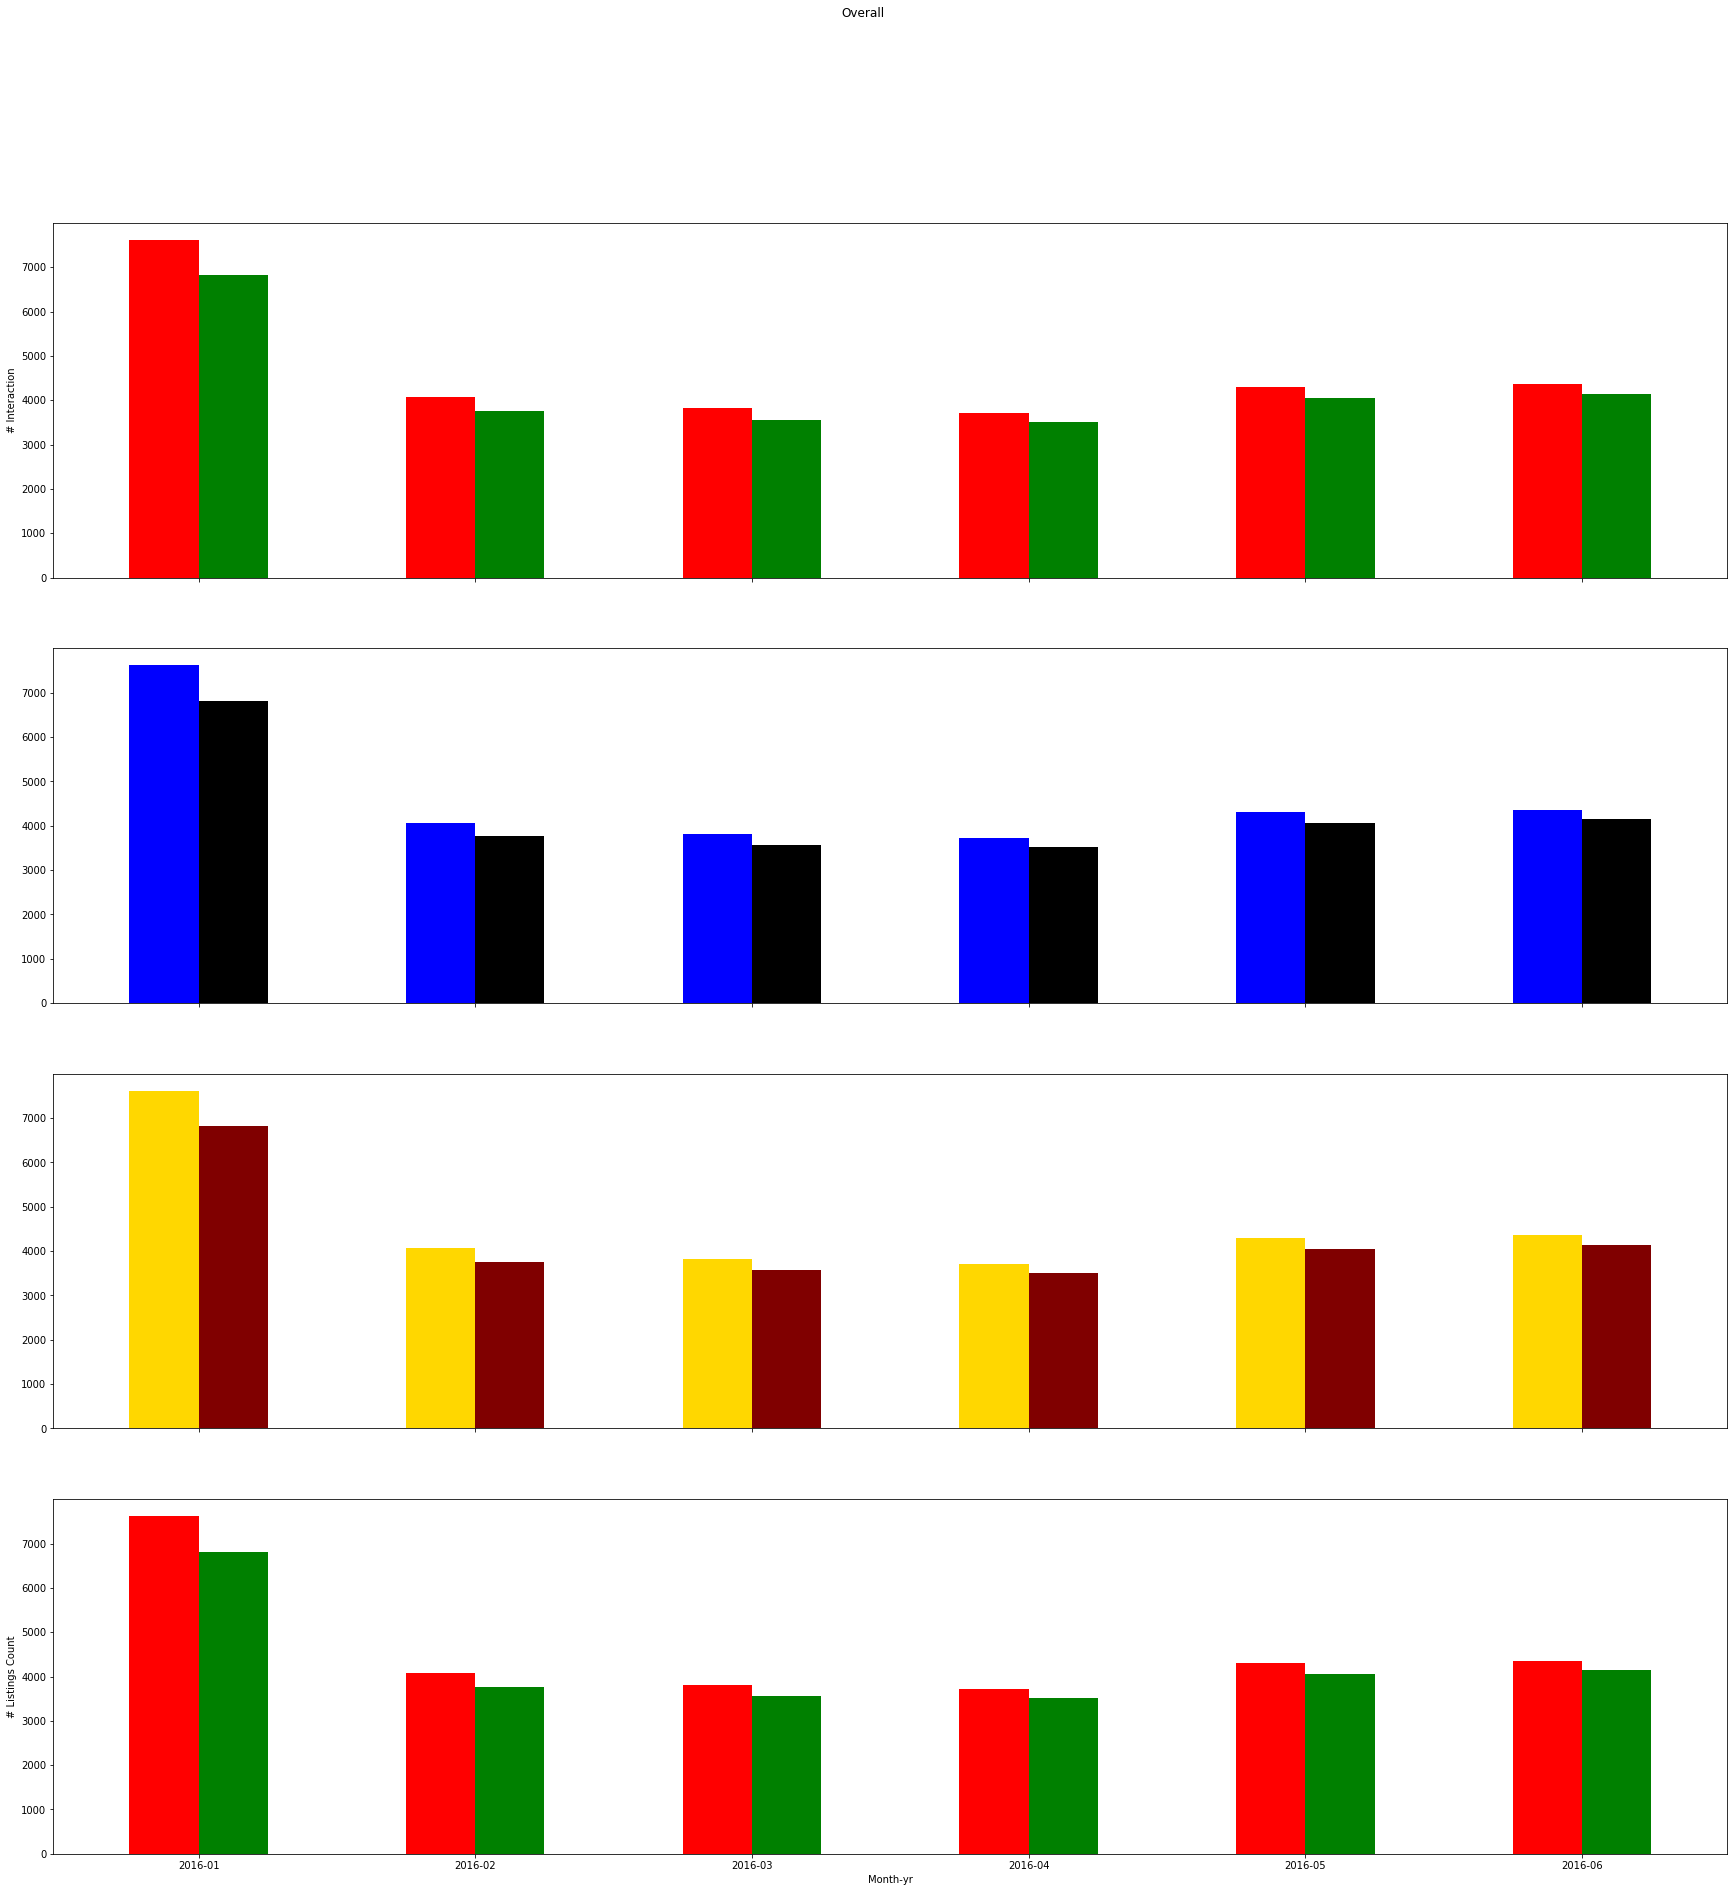

In [52]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True)
fig.set_figheight(30)
fig.set_figwidth(30)
fig.suptitle('Overall')

x = [i for i in final_df['month_yr'].apply(lambda x: x.strftime('%Y-%m'))]
x_indexes = np.arange(len(x))
width = 0.25

# plt.style.use("fivethirtyeight")
ax1.bar(x_indexes,
        final_df['interaction_started(#)'],
        width=width,
        color='red',
        label='Total interactions started over time')
ax1.bar(x_indexes + width,
        final_df['interaction_reply(#)'],
        width=width,
        color='green',
        label='Total replys over time')
ax1.set_ylabel('# Interaction')

ax2.bar(x_indexes,
        final_df['interaction_started(#)'],
        width=width,
        color='blue',
        label='Total interactions started over time')
ax2.bar(x_indexes + width,
        final_df['interaction_reply(#)'],
        width=width,
        color='black',
        label='Total replys over time')

ax3.bar(x_indexes,
        final_df['interaction_started(#)'],
        width=width,
        color='gold',
        label='Total interactions started over time')
ax3.bar(x_indexes + width,
        final_df['interaction_reply(#)'],
        width=width,
        color='maroon',
        label='Total replys over time')

ax4.bar(x_indexes,
        final_df['interaction_started(#)'],
        width=width,
        color='red',
        label='Total interactions started over time')
ax4.bar(x_indexes + width,
        final_df['interaction_reply(#)'],
        width=width,
        color='green',
        label='Total replys over time')
# plt.legend()
plt.xticks(ticks=x_indexes + 0.5*width, labels=x)
# # plt.title("T")
plt.xlabel("Month-yr")
plt.ylabel("# Listings Count")
plt.rcParams['figure.figsize'] = [20, 12]
# plt.tight_layout()
plt.show()


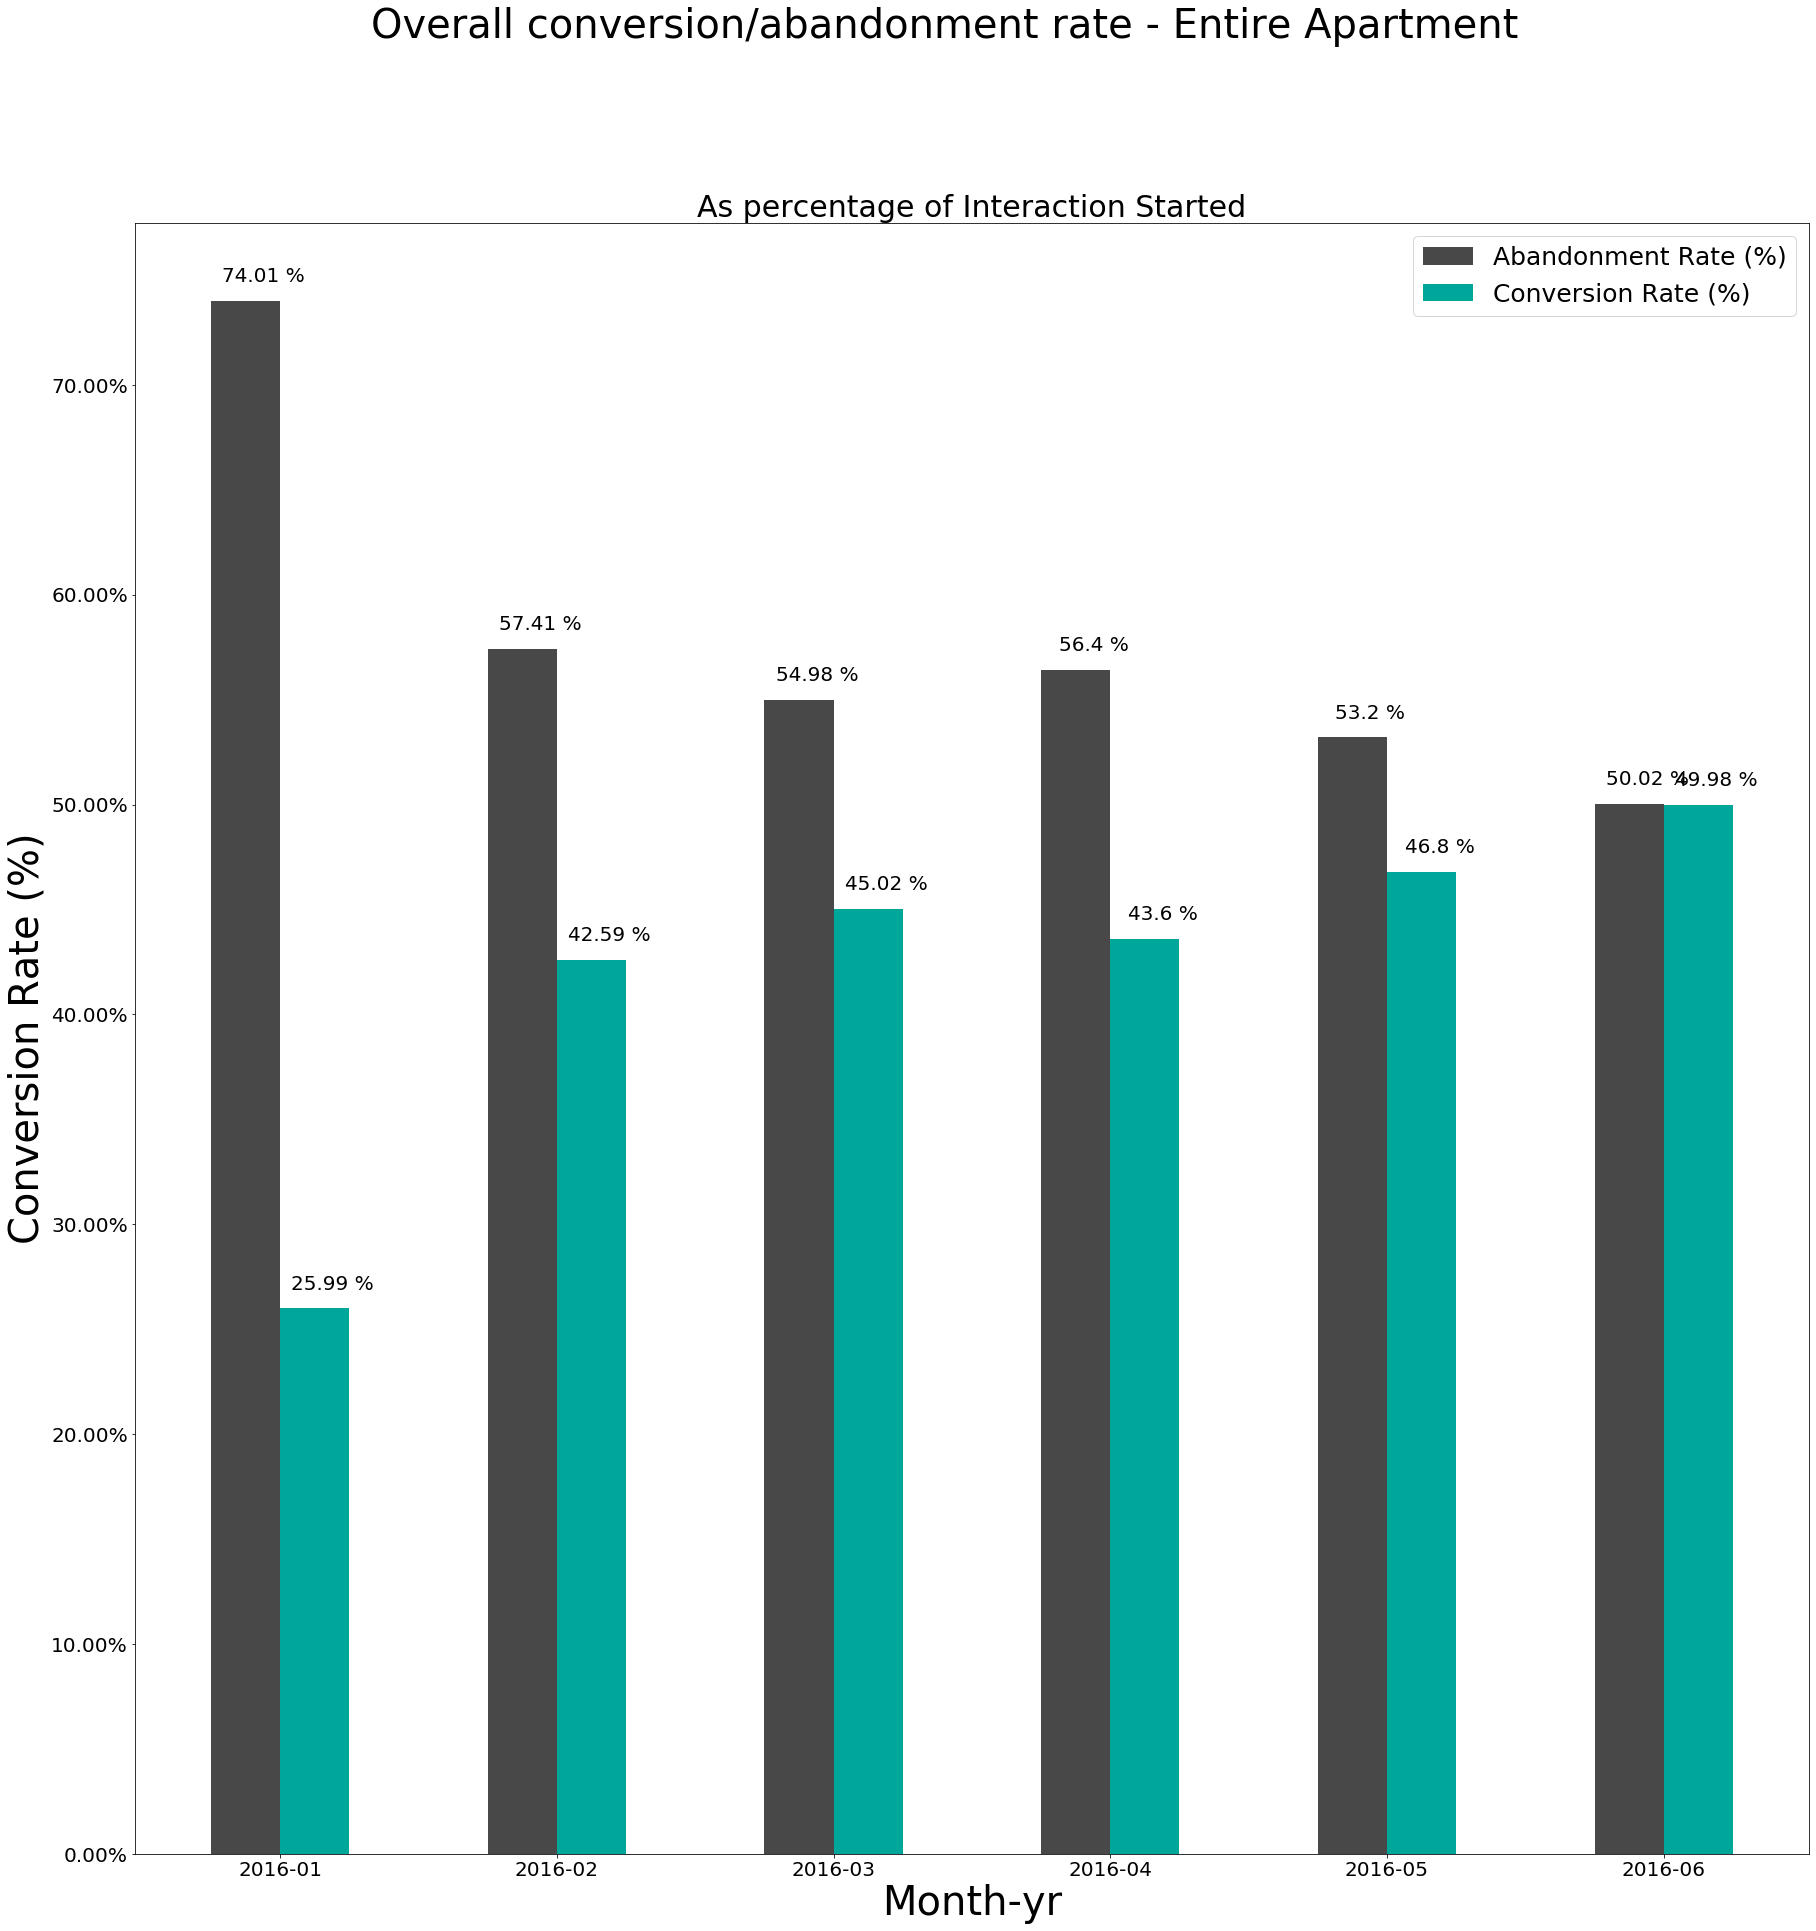

In [53]:
x = [i for i in checkins_df_entire_apt['month_yr'].apply(lambda x: x.strftime('%Y-%m'))]
x_indexes = np.arange(len(x))
width = 0.25

fig, ax = plt.subplots()
fig.set_figheight(30)
fig.set_figwidth(30)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f%%'))
rects1 = ax.bar(x_indexes + 0.25, 
         checkins_df_entire_apt['abandonment_rate(%)'],
         width=width,
         color="#484848", 
         label="Abandonment Rate (%)")
rects2 = ax.bar(x_indexes + 0.5, 
         checkins_df_entire_apt['booking_rate(%)'],
         width=width,
         color="#00A699", 
         label="Booking Rate (%)")
plt.legend(("Abandonment Rate (%)", "Conversion Rate (%)"), fontsize=25)
plt.xticks(ticks=x_indexes + 1.5*width, labels=x, fontsize=20)
plt.yticks(fontsize=20)
plt.title("As percentage of Interaction Started", fontsize=30, ha='center')
plt.suptitle("Overall conversion/abandonment rate - Entire Apartment", fontsize=40, ha='center')
plt.xlabel("Month-yr", fontsize=40)
plt.ylabel("Conversion Rate (%)", fontsize=40)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{} %'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(18, 15),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=20)

autolabel(rects1)
autolabel(rects2)

plt.show()

In [ ]:
booked_private_room_df = checkins_df[(checkins_df['room_type'] == 'Private room') & (checkins_df['is_booking_at'] == False)]
abandoned_private_room_df = checkins_df[(checkins_df['room_type'] == 'Private room') & (checkins_df['is_booking_at'] == True)]

booked_entire_apt_df = checkins_df[(checkins_df['room_type'] == 'Entire home/apt') & (checkins_df['is_booking_at'] == False)]
abandoned_entire_apt_df = checkins_df[(checkins_df['room_type'] == 'Entire home/apt') & (checkins_df['is_booking_at'] == True)]

booked_shared_room_df = checkins_df[(checkins_df['room_type'] == 'Shared room') & (checkins_df['is_booking_at'] == False)]
abandoned_shared_room_df = checkins_df[(checkins_df['room_type'] == 'Shared room') & (checkins_df['is_booking_at'] == True)]


interaction_to_booking = booked_private_room_df[(booked_private_room_df['interaction_to_booking'] > 0.0)].loc[:,'interaction_to_booking']
interaction_to_reply = booked_private_room_df[(booked_private_room_df['interaction_to_reply'] > 0.0)].loc[:,'interaction_to_reply']
reply_to_acceptance = booked_private_room_df[(booked_private_room_df['reply_to_acceptance'] > 0.0)].loc[:,'reply_to_acceptance']
acceptance_to_booking = booked_private_room_df[(booked_private_room_df['acceptance_to_booking'] > 0.0)].loc[:,'acceptance_to_booking']


plt.figure(figsize=(8, 6))
plt.hist(booked_entire_apt_df['interaction_to_reply'], bins=200, alpha=0.7)
plt.hist(booked_private_room_df['interaction_to_booking'], bins=200, alpha=0.7)
plt.hist(booked_entire_apt_df['reply_to_acceptance'], bins=50, alpha=0.5)
plt.hist(booked_entire_apt_df['acceptance_to_booking'], bins=40, alpha=0.5)
plt.xlim(0, 300)
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Multiple Histograms with Matplotlib")
plt.legend(loc='upper right')

print(len(interaction_to_booking), 
      len(interaction_to_reply), 
      len(reply_to_acceptance), 
      len(acceptance_to_booking))